## Processing the raw csv

In [117]:
import pandas as pd
import os
import numpy as np

import ast


name_experiment = 'kl_exp3'

input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/raw_csv/'+name_experiment+'.csv')
data = pd.read_csv(input_csv_path)

data['value'] = data['value'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

#Take after the 6712th row
#data = data.iloc[3356:]

#Relative distance_y to the target (TX is at 10m from origin, and we recorded the position of the RX)
#data['distance_y'] = np.abs(10.0 - data['distance_y'])

data['uav38_distance_x'] = data['uav38_distance_x'].fillna(method='ffill')
data['uav39_distance_x'] = data['uav39_distance_x'].fillna(method='ffill')
data['uav38_distance_y'] = data['uav38_distance_y'].fillna(method='ffill')
data['uav39_distance_y'] = data['uav39_distance_y'].fillna(method='ffill')
data['uav38_distance_z'] = data['uav38_distance_z'].fillna(method='ffill')
data['uav39_distance_z'] = data['uav39_distance_z'].fillna(method='ffill')

data['relative_distance_y'] = np.abs(data['uav38_distance_y'] - data['uav39_distance_y'])

# Remove missing 'value'
data = data.dropna(subset=['value'])

data['num_points'] = data['value'].apply(len)

def calculate_error_rate(values):
    error_count = 0
    for value in values:
        if value not in [0.0,1.0, 2.0, 3.0]:
    #return sum(1 for value in values if value not in [1.0, 2.0, 3.0])
            error_count += 1
    
    return error_count

data['error_count'] = data['value'].apply(calculate_error_rate)

#Function to check occurrence of signal 3
def check_signal_3(values):
    return 1 if 3.0 in values else 0

#Function to check occurrence of signal 2
def check_signal_2(values):
    return 1 if 2.0 in values else 0

#Function to check occurrence of signal 1
def check_signal_1(values):
    return 1 if 1.0 in values else 0

#Function to check occurrence of signal 0
def check_signal_0(values):
    return 1 if 0.0 in values else 0




# Check if the signal 3 is still present
data['signal_3'] = data['value'].apply(check_signal_3)

# Check if the signal 2 is still present
data['signal_2'] = data['value'].apply(check_signal_2)

# Check if the signal 1 is still present
data['signal_1'] = data['value'].apply(check_signal_1)

# Check if the signal 0 is still present
data['signal_0'] = data['value'].apply(check_signal_0)


specified_distances = np.array([5, 10, 15, 20, 25, 30])

# Assigning each data point to the nearest specified distance_y
data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['relative_distance_y'].values).argmin(axis=0)]

#Processed

cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/'+name_experiment+'_processed.csv')


data.to_csv(cleaned_file_path, index=False)

cleaned_file_path 


data.head()




,timestamp,uav38_distance_x,uav38_distance_y,uav38_distance_z,uav39_distance_x,uav39_distance_y,uav39_distance_z,value,relative_distance_y,num_points,error_count,signal_3,signal_2,signal_1,signal_0,nearest_distance
0,1.713792e+09,NaN,NaN,NaN,NaN,NaN,NaN,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",NaN,15,15,0,0,0,0,5
1,1.713792e+09,NaN,NaN,NaN,NaN,NaN,NaN,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",NaN,16,16,0,0,0,0,5
2,1.713792e+09,NaN,NaN,NaN,NaN,NaN,NaN,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",NaN,14,14,0,0,0,0,5
3,1.713792e+09,NaN,NaN,NaN,NaN,NaN,NaN,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",NaN,13,13,0,0,0,0,5
4,1.713792e+09,NaN,NaN,NaN,NaN,NaN,NaN,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",NaN,11,11,0,0,0,0,5


# Processing raw csv v2

In [4]:
import pandas as pd
import os
import numpy as np
import ast

# Experiment name
name_experiment = 'kl_exp1'

# Paths
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/raw_csv_v2/' + name_experiment + '.csv')
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/' + name_experiment + '_processed.csv')

# Read data
data = pd.read_csv(input_csv_path)
data['value'] = data['value'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
data['point_x'] = data['point_x'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
data['point_y'] = data['point_y'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Ensure the fields are lists
def ensure_list(x):
    return x if isinstance(x, list) else [x]

data['value'] = data['value'].apply(ensure_list)
data['point_x'] = data['point_x'].apply(ensure_list)
data['point_y'] = data['point_y'].apply(ensure_list)

# Define center area of the image
image_height, image_width = 480, 752
center_x_min, center_x_max = 0.2 * image_width, 0.8 * image_width
center_y_min, center_y_max = 0.2 * image_height, 0.8 * image_height

# Function to filter points in the center of the image
def filter_center_points(values, point_x, point_y):
    filtered_values, filtered_point_x, filtered_point_y = [], [], []
    for v, x, y in zip(values, point_x, point_y):
        if center_x_min <= x <= center_x_max and center_y_min <= y <= center_y_max:
            filtered_values.append(v)
            filtered_point_x.append(x)
            filtered_point_y.append(y)
    return filtered_values, filtered_point_x, filtered_point_y

# Apply filtering to each row
filtered_results = data.apply(
    lambda row: filter_center_points(row['value'], row['point_x'], row['point_y']), axis=1
)

# Update the DataFrame with filtered results
data['value'] = filtered_results.apply(lambda x: x[0])
data['point_x'] = filtered_results.apply(lambda x: x[1])
data['point_y'] = filtered_results.apply(lambda x: x[2])


# Fill missing values for UAV distances
uav_fields = ['uav38_distance_x', 'uav38_distance_y', 'uav38_distance_z', 
              'uav39_distance_x', 'uav39_distance_y', 'uav39_distance_z']

for field in uav_fields:
    data[field] = data[field].fillna(method='ffill')


# Remove rows where 'value' is empty after filtering
data = data[data['value'].str.len() > 0]

# Calculate relative distance_y
#data['relative_distance_y'] = np.abs(data['uav38_distance_y'] - data['uav39_distance_y'])
data['relative_distance_y'] = np.abs(data['uav39_distance_y'] - 10)

# Calculate number of points
data['num_points'] = data['value'].apply(len)

# Error rate calculation
def calculate_error_rate(values):
    error_count = 0
    for value in values:
        if value not in [0.0, 1.0, 2.0, 3.0]:
            error_count += 1
    return error_count

data['error_count'] = data['value'].apply(calculate_error_rate)

# Signal occurrence functions
def check_signal_3(values):
    return 1 if 3.0 in values else 0

def check_signal_2(values):
    return 1 if 2.0 in values else 0

def check_signal_1(values):
    return 1 if 1.0 in values else 0

def check_signal_0(values):
    return 1 if 0.0 in values else 0

# Apply signal checks
data['signal_3'] = data['value'].apply(check_signal_3)
data['signal_2'] = data['value'].apply(check_signal_2)
data['signal_1'] = data['value'].apply(check_signal_1)
data['signal_0'] = data['value'].apply(check_signal_0)

# Assign nearest distance
specified_distances = np.array([5, 10, 15, 20, 25, 30])
data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['relative_distance_y'].values).argmin(axis=0)]

# Save processed data
data.to_csv(cleaned_file_path, index=False)

# Output path
cleaned_file_path

# Display the first few rows
data.head()

,timestamp,uav38_distance_x,uav38_distance_y,uav38_distance_z,uav39_distance_x,uav39_distance_y,uav39_distance_z,value,point_x,point_y,relative_distance_y,num_points,error_count,signal_3,signal_2,signal_1,signal_0,nearest_distance
781,1.713638e+09,-63.810145,-2.106754,0.001549,-67.615333,-1.917332,0.226842,[-2.0],[509.0],[268.0],11.917332,1,1,0,0,0,0,10
786,1.713638e+09,-63.810564,-2.106765,0.001536,-67.615170,-1.916776,0.226822,[-2.0],[509.0],[268.0],11.916776,1,1,0,0,0,0,10
791,1.713638e+09,-63.811156,-2.106827,0.001780,-67.614996,-1.916427,0.226781,[-2.0],[509.0],[266.0],11.916427,1,1,0,0,0,0,10
794,1.713638e+09,-63.811449,-2.106932,0.002102,-67.614923,-1.916191,0.235643,[-2.0],[509.0],[265.0],11.916191,1,1,0,0,0,0,10
799,1.713638e+09,-63.820574,-2.106548,0.003619,-67.614726,-1.915763,0.231350,[-2.0],[509.0],[265.0],11.915763,1,1,0,0,0,0,10


In [3]:
import pandas as pd
import os
import numpy as np
import ast

## Processing of multiple UAVs


In [5]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/kl_exp1_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[376:13954]


indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_kl_exp1 = data

1000
3062
2098
2099
2091
3435


In [3]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/standard_exp3_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
data = data.iloc[376:13954]


indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_standard = data


2444
2094
2100
2098
2094
2748


In [4]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/otsu_exp3_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1839:31760]
data = data.iloc[1736:15611]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))

data_otsu_adaptive = data

2618
2096
2096
2097
2095
2873


In [5]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/kl_exp3_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1928:31760]
data = data.iloc[1180:15134]


indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))

data_kl_adaptive = data

2605
2091
2097
2096
2096
2969


In [6]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/otsu_exp3_ex500_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1793:31760]
data = data.iloc[582:13610]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_adaptive_ex500 = data

2296
2087
2099
2089
2101
2356


In [7]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/kl_exp3_ex500_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1994:31760]
data = data.iloc[921:14504]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_kl_adaptive_ex500 = data

2689
2095
2096
2095
2099
2509


In [8]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/standard_exp3_ex500_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1999:31760]
data = data.iloc[792:15999]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_standard_ex500 = data

3868
2096
2103
2101
2086
2953


In [6]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/otsu_exp3_heading_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1793:31760]
data = data.iloc[1602:18043]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_adaptive_heading = data

5874
2099
2098
2095
2099
2176


In [5]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/kl_exp3_heading_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1793:31760]
data = data.iloc[419:14218]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_kl_adaptive_heading = data

3102
2096
2100
2091
2101
2309


In [4]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/standard_exp3_heading_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1793:31760]
#819
data = data.iloc[1600:14120]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_standard_heading = data

2022
2097
2096
2097
2096
2112


In [12]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/otsu_exp1_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

data = data.iloc[6712:]


#8258
#Trim 3500 rows before the 8258th row
#data = data.iloc[3500:]


indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))

data_otsu_adaptive_exp1 = data


2405
5735
17545
3500
3500
28061


In [2]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/otsu_exp1_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)



#8258
#Trim 3500 rows before the 8258th row
#data = data.iloc[3500:]


indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))

data_otsu_adaptive_exp1_2 = data

6403
7528
10508
2095
2097
7701


In [13]:
import pandas as pd
import os
import numpy as np

import ast


input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/raw_csv/otsu_multiple_topics.csv')
data = pd.read_csv(input_csv_path)

#Ensure that the 'value' column is a list
data['value'] = data['value'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

#Relative distance to the target (TX is at 10m from origin, and we recorded the position of the RX)
data['distance_x'] = 10.0 - data['distance_x']

data['distance_x'] = data['distance_x'].fillna(method='ffill')

# Remove missing 'value'
data = data.dropna(subset=['value'])

#Add a column for the number of points in each row
data['num_points'] = data['value'].apply(len)


def calculate_error_rate(values):
    error_count = 0
    for value in values:
        if value not in [1.0, 2.0, 3.0]:
    #return sum(1 for value in values if value not in [1.0, 2.0, 3.0])
            error_count += 1
    
    return error_count

data['error_count'] = data['value'].apply(calculate_error_rate)

#Function to check occurrence of signal 3
def check_signal_3(values):
    return 1 if 3.0 in values else 0

#Function to check occurrence of signal 2
def check_signal_2(values):
    return 1 if 2.0 in values else 0

#Function to check occurrence of signal 1
def check_signal_1(values):
    return 1 if 1.0 in values else 0


# Check if the signal 3 is still present
data['signal_3'] = data['value'].apply(check_signal_3)

# Check if the signal 2 is still present
data['signal_2'] = data['value'].apply(check_signal_2)

# Check if the signal 1 is still present
data['signal_1'] = data['value'].apply(check_signal_1)


specified_distances = np.array([5, 8, 11, 14, 17, 20])

# Assigning each data point to the nearest specified distance
data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['distance_x'].values).argmin(axis=0)]

# Save the cleaned data to a new CSV file
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/processed_csv/otsu_multiple_topics_processed.csv')

data.to_csv(cleaned_file_path, index=False)

cleaned_file_path 


data.head()

,timestamp,distance_x,value,num_points,error_count,signal_3,signal_2,signal_1,nearest_distance
1,145.308,8.070875,"[9.0, 11.0]",2,2,0,0,0,8
3,145.316,8.070875,"[1.0, 3.0, 5.0, 4.0, 7.0]",5,3,1,0,1,8
5,145.328,8.070875,"[9.0, 11.0]",2,2,0,0,0,8
6,145.336,8.070875,"[1.0, 3.0, 5.0, 4.0, 7.0]",5,3,1,0,1,8
8,145.344,8.070875,"[9.0, 11.0]",2,2,0,0,0,8


## Loading the static measurments datasets

In [88]:
#Loading the data
import pandas as pd
import os
import numpy as np


""" # Load the data of threshold 50
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_50_v2_processed.csv')
data_static_50 = pd.read_csv(input_csv_path)
data_static_50.head(5)

# Load the data of threshold 100 
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_100_v2_1_processed.csv')
data_static_100 = pd.read_csv(input_csv_path)

# Load the data of threshold 150
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_150_v2_processed.csv')
data_static_150 = pd.read_csv(input_csv_path)

# Load the data of threshold 200
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_200_v2_processed.csv')
data_static_200 = pd.read_csv(input_csv_path)
data_static_200.head(5)

 
#Load the data of adaptive
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_kl_adaptive_v2_processed.csv')
data_static_kl_adaptive = pd.read_csv(input_csv_path)
data_static_kl_adaptive.head(5)

#Load the data of otsu adaptive
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_otsu_adaptive_v2_processed.csv')
data_static_otsu_adaptive = pd.read_csv(input_csv_path)
data_static_otsu_adaptive.head(5) 
 """



input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/otsu_exp3_processed.csv')
data_otsu_adaptive = pd.read_csv(input_csv_path)
data_otsu_adaptive.head(5)

#Data for the standard
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/standard_exp3_processed.csv')
data_standard = pd.read_csv(input_csv_path)
data_standard.head(5)





,timestamp,uav38_distance_x,uav38_distance_y,uav38_distance_z,uav39_distance_x,uav39_distance_y,uav39_distance_z,value,relative_distance_y,num_points,error_count,signal_3,signal_2,signal_1,signal_0,nearest_distance
0,1.713793e+09,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,0,0,0,0,0,0,5
1,1.713793e+09,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,0,0,0,0,0,0,5
2,1.713793e+09,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,0,0,0,0,0,0,5
3,1.713793e+09,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,0,0,0,0,0,0,5
4,1.713793e+09,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,0,0,0,0,0,0,5


## Adaptive Otsu Thresholding (1000us)

In [14]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_summary = data_otsu_adaptive.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary['error_rate'] = otsu_adaptive_summary['total_errors'] / otsu_adaptive_summary['total_entries']
otsu_adaptive_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,7854,564,0.071811
1,10,6288,542,0.086196
2,15,6424,3538,0.550747
3,20,6348,4645,0.731727
4,25,6492,6373,0.981670
5,30,8657,8650,0.999191


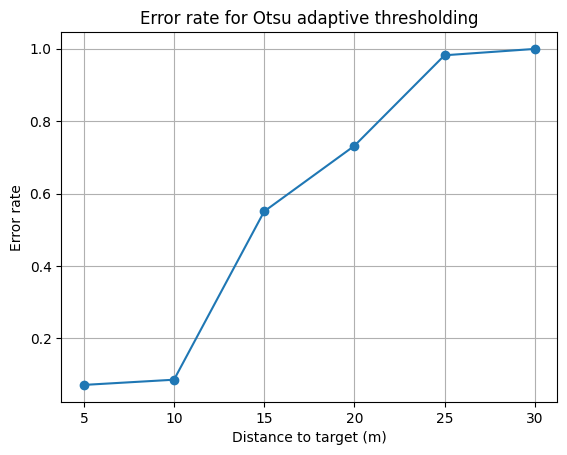

In [15]:
#Plotting the error rate for otsu adaptive
import matplotlib.pyplot as plt

plt.plot(otsu_adaptive_summary['nearest_distance'], otsu_adaptive_summary['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for Otsu adaptive thresholding')
plt.grid()
plt.show()


In [98]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_summary = data_otsu_adaptive.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary['error_rate'] = otsu_adaptive_summary['total_errors'] / otsu_adaptive_summary['total_entries']
otsu_adaptive_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,8040,702,0.087313
1,10,5019,424,0.084479
2,15,2274,426,0.187335
3,20,7489,4224,0.564027
4,25,7375,5574,0.755797
5,30,16976,16809,0.990163


## Adaptive KL-Divergence Minimization (1000us)

In [16]:
#Summarizing the frequency of data otsu adaptive

kl_adaptive_summary = data_kl_adaptive.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary['error_rate'] = kl_adaptive_summary['total_errors'] / kl_adaptive_summary['total_entries']
kl_adaptive_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,7842,754,0.096149
1,10,6685,1061,0.158714
2,15,9135,5945,0.650794
3,20,6846,6115,0.893222
4,25,6378,6367,0.998275
5,30,9109,9101,0.999122


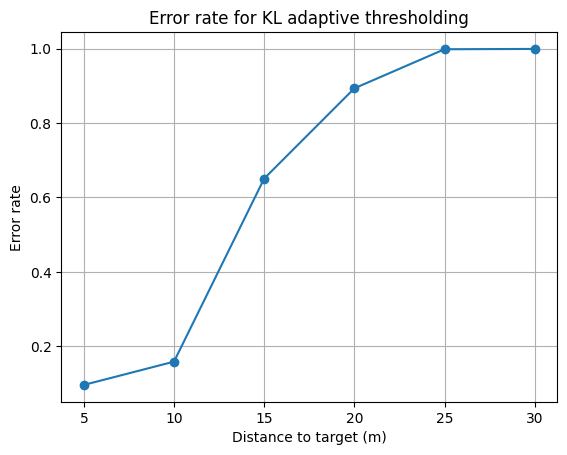

In [17]:
#Plotting the error rate for kl adaptive
import matplotlib.pyplot as plt

plt.plot(kl_adaptive_summary['nearest_distance'], kl_adaptive_summary['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for KL adaptive thresholding')
plt.grid()
plt.show()


In [121]:
#Summarizing the frequency of data otsu adaptive

kl_adaptive_summary = data_kl_adaptive.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary['error_rate'] = kl_adaptive_summary['total_errors'] / kl_adaptive_summary['total_entries']
kl_adaptive_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,7960,1203,0.151131
1,10,1490,212,0.142282
2,15,7018,1284,0.182958
3,20,9480,6240,0.658228
4,25,7200,6454,0.896389
5,30,17306,17285,0.998787


## Static Thresholding (1000us)

In [18]:
#Summarizing the frequency of standard data

standard_summary = data_standard.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
standard_summary['error_rate'] = standard_summary['total_errors'] / standard_summary['total_entries']
standard_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,7332,579,0.078969
1,10,6282,506,0.080548
2,15,6325,3537,0.559209
3,20,4817,4690,0.973635
4,25,4266,4236,0.992968
5,30,4643,4475,0.963816


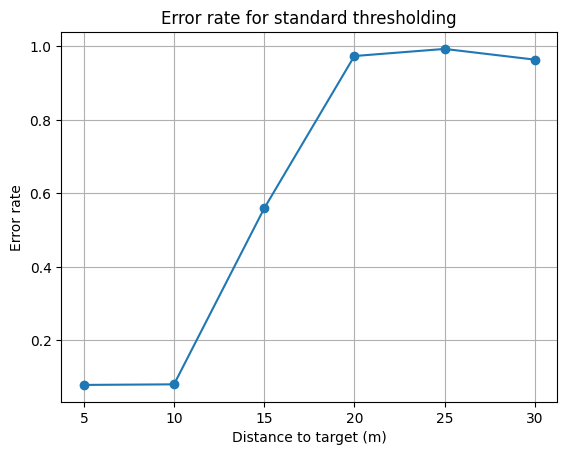

In [19]:
#Plot error rate for standard
import matplotlib.pyplot as plt

plt.plot(standard_summary['nearest_distance'], standard_summary['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for standard thresholding')
plt.grid()
plt.show()



In [96]:
#Summarizing the frequency of standard data

standard_summary = data_standard.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
standard_summary['error_rate'] = standard_summary['total_errors'] / standard_summary['total_entries']
standard_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,7589,721,0.095006
1,10,6466,540,0.083514
2,15,6511,3662,0.562433
3,20,5009,4870,0.972250
4,25,4460,4430,0.993274
5,30,4819,4651,0.965138


## Adaptive Otsu Thresholding (500us)

In [20]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_ex500_summary = data_adaptive_ex500.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_ex500_summary['error_rate'] = otsu_adaptive_ex500_summary['total_errors'] / otsu_adaptive_ex500_summary['total_entries']
otsu_adaptive_ex500_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,6888,373,0.054152
1,10,6261,274,0.043763
2,15,6346,1534,0.241727
3,20,6483,5575,0.859941
4,25,6410,6338,0.988768
5,30,6881,6797,0.987792


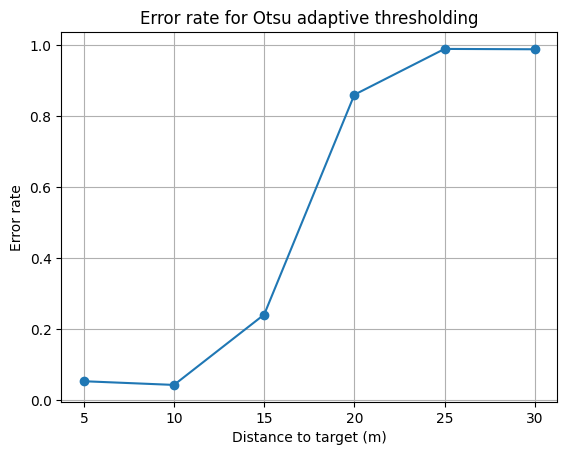

In [21]:
#Plotting the error rate for otsu adaptive
import matplotlib.pyplot as plt

plt.plot(otsu_adaptive_ex500_summary['nearest_distance'], otsu_adaptive_ex500_summary['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for Otsu adaptive thresholding')
plt.grid()
plt.show()


In [104]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_ex500_summary = data_adaptive_ex500.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_ex500_summary['error_rate'] = otsu_adaptive_ex500_summary['total_errors'] / otsu_adaptive_ex500_summary['total_entries']
otsu_adaptive_ex500_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,5699,420,0.073697
1,10,2886,188,0.065142
2,15,6516,607,0.093155
3,20,6814,2179,0.319783
4,25,6754,5923,0.876962
5,30,13425,13204,0.983538


## Adaptive KL-Divergence Minimization (500us)

In [22]:
#Summarizing the frequency of data otsu adaptive

kl_adaptive_ex500_summary = data_kl_adaptive_ex500.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_ex500_summary['error_rate'] = kl_adaptive_ex500_summary['total_errors'] / kl_adaptive_ex500_summary['total_entries']
kl_adaptive_ex500_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,9596,2098,0.218633
1,10,7451,1447,0.194202
2,15,8109,4945,0.609816
3,20,6767,6585,0.973105
4,25,6204,6110,0.984848
5,30,7374,7238,0.981557


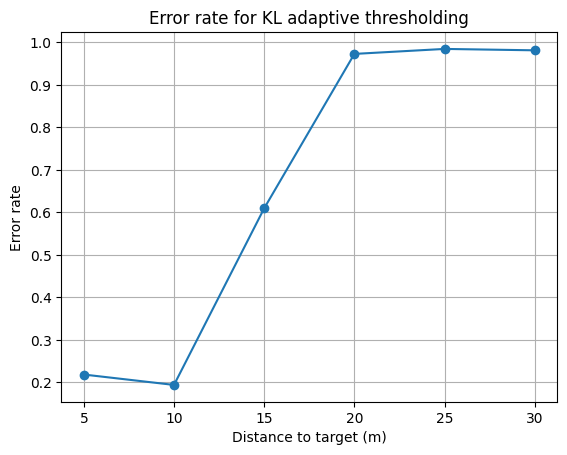

In [23]:
#Plotting the error rate for kl adaptive
import matplotlib.pyplot as plt

plt.plot(kl_adaptive_ex500_summary['nearest_distance'], kl_adaptive_ex500_summary['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for KL adaptive thresholding')
plt.grid()
plt.show()


In [124]:
#Summarizing the frequency of data otsu adaptive

kl_adaptive_ex500_summary = data_kl_adaptive_ex500.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_ex500_summary['error_rate'] = kl_adaptive_ex500_summary['total_errors'] / kl_adaptive_ex500_summary['total_entries']
kl_adaptive_ex500_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,12517,4946,0.395143
1,10,12887,6869,0.533018
2,15,12819,9650,0.752789
3,20,11810,11616,0.983573
4,25,8943,8846,0.989154
5,30,8271,8134,0.983436


## Static thresholding (500us)

In [24]:
#Summarizing the frequency of data otsu adaptive

standard_ex500_summary = data_standard_ex500.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
standard_ex500_summary['error_rate'] = standard_ex500_summary['total_errors'] / standard_ex500_summary['total_entries']
standard_ex500_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,11648,688,0.059066
1,10,6288,263,0.041826
2,15,6231,3714,0.596052
3,20,4203,3826,0.910302
4,25,2108,1464,0.694497
5,30,2968,2944,0.991914


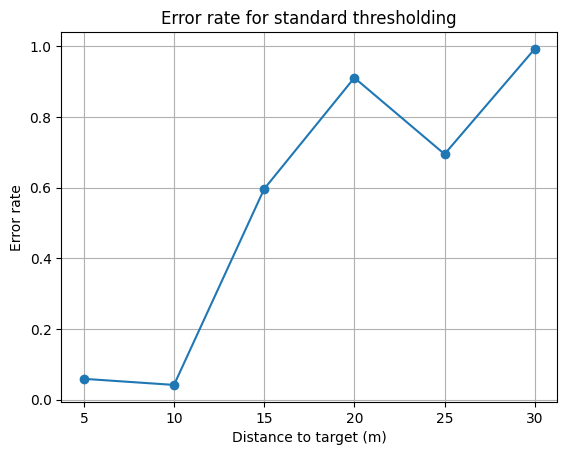

In [25]:
#Plot error rate for standard
import matplotlib.pyplot as plt

plt.plot(standard_ex500_summary['nearest_distance'], standard_ex500_summary['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for standard thresholding')
plt.grid()
plt.show()


In [94]:
#Summarizing the frequency of data otsu adaptive

standard_ex500_summary = data_standard_ex500.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
standard_ex500_summary['error_rate'] = standard_ex500_summary['total_errors'] / standard_ex500_summary['total_entries']
standard_ex500_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,11648,688,0.059066
1,10,6288,263,0.041826
2,15,6231,3714,0.596052
3,20,4203,3826,0.910302
4,25,2108,1464,0.694497
5,30,2968,2944,0.991914


## Results from night adaptive method

In [6]:
#Summarizing the frequency of data otsu adaptive

kl_adaptive_summary_exp1 = data_kl_exp1.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary_exp1['error_rate'] = kl_adaptive_summary_exp1['total_errors'] / kl_adaptive_summary_exp1['total_entries']
kl_adaptive_summary_exp1

,nearest_distance,total_entries,total_errors,error_rate
0,5,3298,1024,0.310491
1,10,9184,2033,0.221363
2,15,6324,998,0.157812
3,20,6384,6024,0.943609
4,25,6131,6104,0.995596
5,30,8948,8948,1.000000


In [3]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_summary_exp1_2 = data_otsu_adaptive_exp1_2.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary_exp1_2['error_rate'] = otsu_adaptive_summary_exp1_2['total_errors'] / otsu_adaptive_summary_exp1_2['total_entries']
otsu_adaptive_summary_exp1_2

,nearest_distance,total_entries,total_errors,error_rate
0,5,18528,3905,0.210762
1,10,22555,1758,0.077943
2,15,31788,3168,0.099660
3,20,6672,5685,0.852068
4,25,6546,6359,0.971433
5,30,22766,22643,0.994597


In [26]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_summary_exp1 = data_otsu_adaptive_exp1.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary_exp1['error_rate'] = otsu_adaptive_summary_exp1['total_errors'] / otsu_adaptive_summary_exp1['total_entries']
otsu_adaptive_summary_exp1

,nearest_distance,total_entries,total_errors,error_rate
0,5,3639,407,0.111844
1,10,8725,988,0.113238
2,15,26407,2093,0.079259
3,20,5250,309,0.058857
4,25,5305,411,0.077474
5,30,38511,35394,0.919062


# Heading experiments

In [27]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_summary_heading = data_adaptive_heading.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary_heading['error_rate'] = otsu_adaptive_summary_heading['total_errors'] / otsu_adaptive_summary_heading['total_entries']
otsu_adaptive_summary_heading



,nearest_distance,total_entries,total_errors,error_rate
0,5,16914,10882,0.643372
1,10,6232,4285,0.687580
2,15,6193,4251,0.686420
3,20,5086,3067,0.603028
4,25,4339,2440,0.562342
5,30,4706,3610,0.767106


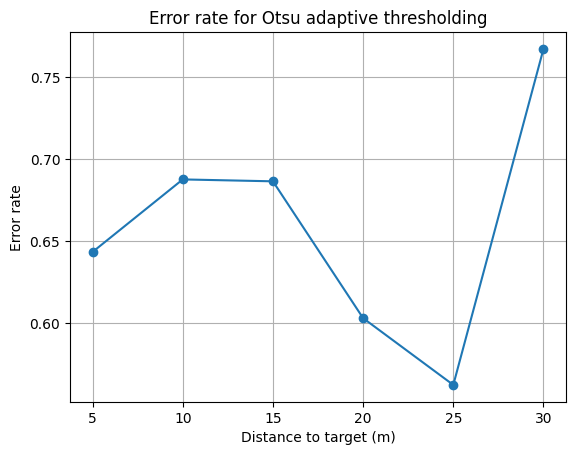

In [28]:
#Plotting the error rate for otsu adaptive
import matplotlib.pyplot as plt

plt.plot(otsu_adaptive_summary_heading['nearest_distance'], otsu_adaptive_summary_heading['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for Otsu adaptive thresholding')
plt.grid()
plt.show()


In [29]:
#Summarizing the frequency of data otsu adaptive

kl_adaptive_summary_heading = data_kl_adaptive_heading.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary_heading['error_rate'] = kl_adaptive_summary_heading['total_errors'] / kl_adaptive_summary_heading['total_entries']
kl_adaptive_summary_heading


,nearest_distance,total_entries,total_errors,error_rate
0,5,9625,5467,0.568000
1,10,6240,4286,0.686859
2,15,6148,4223,0.686890
3,20,5201,3397,0.653144
4,25,4499,3927,0.872861
5,30,4837,4725,0.976845


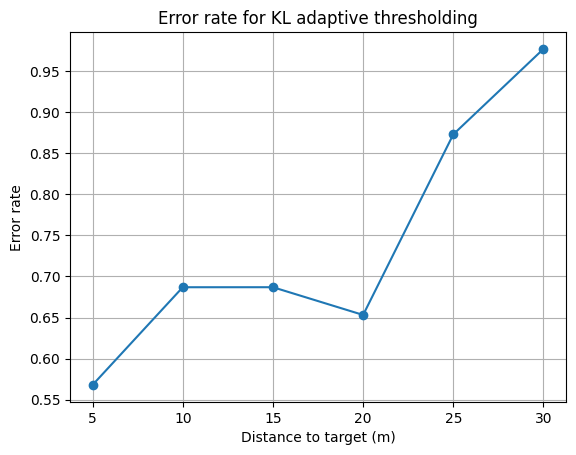

In [30]:
#Plotting the error rate for otsu adaptive
import matplotlib.pyplot as plt

plt.plot(kl_adaptive_summary_heading['nearest_distance'], kl_adaptive_summary_heading['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for KL adaptive thresholding')
plt.grid()
plt.show()

In [31]:
#Summarizing the frequency of data otsu adaptive

standard_summary_heading = data_standard_heading.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
standard_summary_heading['error_rate'] = standard_summary_heading['total_errors'] / standard_summary_heading['total_entries']
standard_summary_heading

,nearest_distance,total_entries,total_errors,error_rate
0,5,6026,837,0.138898
1,10,4194,2259,0.538627
2,15,4192,2162,0.515744
3,20,4197,2369,0.564451
4,25,4353,3895,0.894785
5,30,3304,3156,0.955206


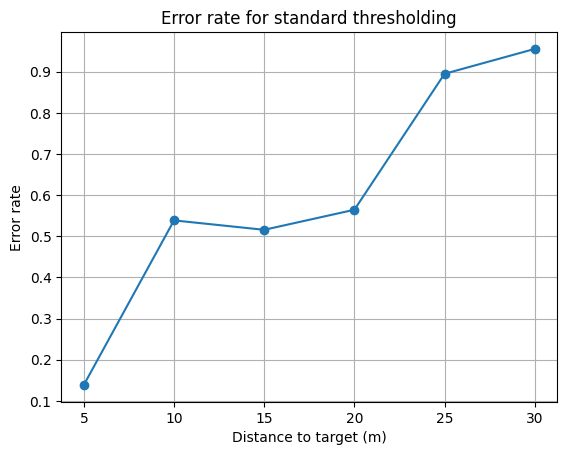

In [32]:
#Plot error rate for standard
import matplotlib.pyplot as plt

plt.plot(standard_summary_heading['nearest_distance'], standard_summary_heading['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for standard thresholding')
plt.grid()
plt.show()


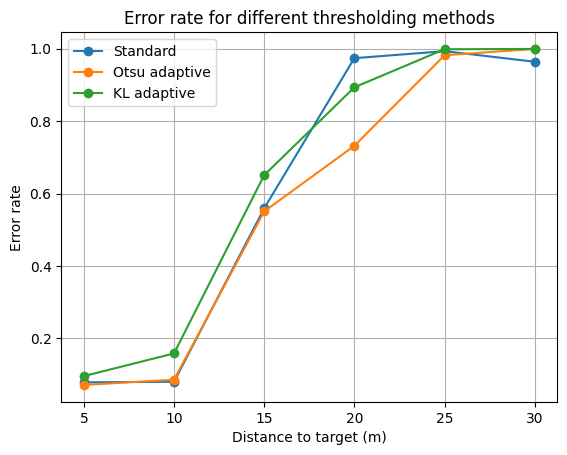

In [33]:
#Plot all the error rates for the different thresholding methods together

plt.plot(standard_summary['nearest_distance'], standard_summary['error_rate'], marker='o', label='Standard')
plt.plot(otsu_adaptive_summary['nearest_distance'], otsu_adaptive_summary['error_rate'], marker='o', label='Otsu adaptive')
plt.plot(kl_adaptive_summary['nearest_distance'], kl_adaptive_summary['error_rate'], marker='o', label='KL adaptive')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for different thresholding methods')
plt.legend()
plt.grid()
plt.show()


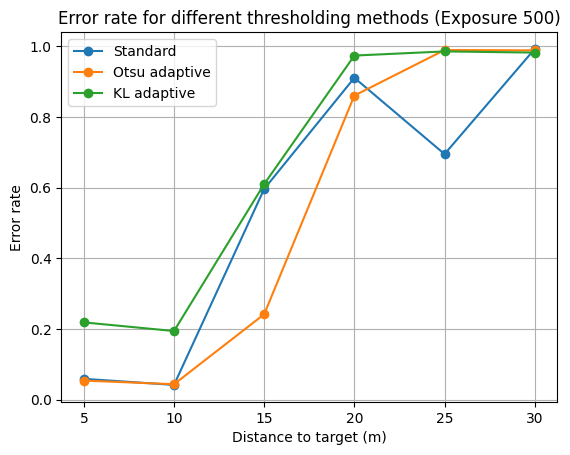

In [34]:
#Plot all the error rates for the different thresholding methods together for ex500

plt.plot(standard_ex500_summary['nearest_distance'], standard_ex500_summary['error_rate'], marker='o', label='Standard')
plt.plot(otsu_adaptive_ex500_summary['nearest_distance'], otsu_adaptive_ex500_summary['error_rate'], marker='o', label='Otsu adaptive')
plt.plot(kl_adaptive_ex500_summary['nearest_distance'], kl_adaptive_ex500_summary['error_rate'], marker='o', label='KL adaptive')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for different thresholding methods (Exposure 500)')
plt.legend()
plt.grid()
plt.show()




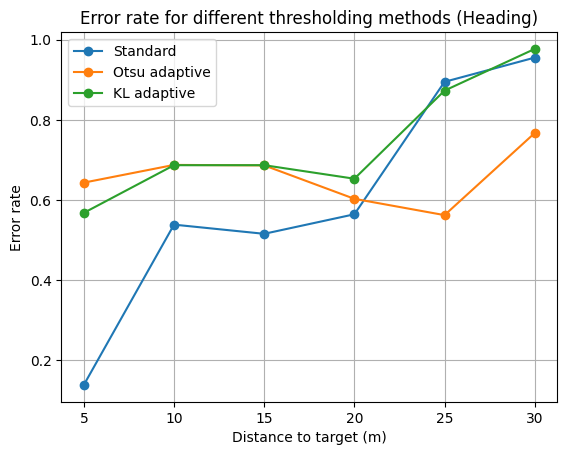

In [35]:
#Plot all the error rates for the different thresholding methods together for heading

plt.plot(standard_summary_heading['nearest_distance'], standard_summary_heading['error_rate'], marker='o', label='Standard')
plt.plot(otsu_adaptive_summary_heading['nearest_distance'], otsu_adaptive_summary_heading['error_rate'], marker='o', label='Otsu adaptive')
plt.plot(kl_adaptive_summary_heading['nearest_distance'], kl_adaptive_summary_heading['error_rate'], marker='o', label='KL adaptive')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for different thresholding methods (Heading)')
plt.legend()
plt.grid()
plt.show()


## Loading the dynamic measurments datasets

In [22]:



# Load the data of threshold 50
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_50_processed.csv')
data_dynamic_50 = pd.read_csv(input_csv_path)
data_dynamic_50.head(5)

# Load the data of threshold 100
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_100_v2_processed.csv')
data_dynamic_100_v2 = pd.read_csv(input_csv_path)
data_dynamic_100_v2.head(5)

#Load the data of threshold 150
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_150_processed.csv')
data_dynamic_150 = pd.read_csv(input_csv_path)
data_dynamic_150.head(5)

# Load the data dynamic threshold 200
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_200_processed.csv')
data_dynamic_200 = pd.read_csv(input_csv_path)
data_dynamic_200.head(5)


#Load the data of kl adaptive
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/kl_dynamic_adaptive_processed.csv')
data_dynamic_kl_adaptive = pd.read_csv(input_csv_path)
data_dynamic_kl_adaptive.head(5)

#Load the data of otsu adaptive
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/otsu_dynamic_adaptive_processed.csv')
data_dynamic_otsu_adaptive = pd.read_csv(input_csv_path)
data_dynamic_otsu_adaptive.head(5)





,timestamp,distance_x,value,is_error,nearest_distance
0,513.392,4.995767,0.0,0,5
1,513.404,4.995767,0.0,0,5
2,513.404,4.995767,2.0,0,5
3,513.404,4.995767,2.0,0,5
4,513.412,4.995767,0.0,0,5


In [24]:
#Summarizing the frequency of errors for threshold 50
th_50_summary_static = data_static_50.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
th_50_summary_static['error_rate'] = th_50_summary_static['total_errors'] / th_50_summary_static['total_entries']
th_50_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,8603,8041,0.934674
1,8,8503,7861,0.924497
2,11,8518,7736,0.908194
3,14,6897,6698,0.971147
4,17,5824,5596,0.960852
5,20,5442,5303,0.974458


In [27]:
#Summarizing the frequency of errors for threshold 100
th_100_summary_static = data_static_100.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
th_100_summary_static['error_rate'] = th_100_summary_static['total_errors'] / th_100_summary_static['total_entries']
th_100_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10749,746,0.069402
1,8,10692,1350,0.126263
2,11,10710,1080,0.100840
3,14,8383,4570,0.545151
4,17,7151,3927,0.549154
5,20,6850,5086,0.742482


In [28]:
#Summarizing the frequency of errors for threshold 150
th_150_summary_static = data_static_150.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
th_150_summary_static['error_rate'] = th_150_summary_static['total_errors'] / th_150_summary_static['total_entries']
th_150_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10749,791,0.073588
1,8,10725,1202,0.112075
2,11,10748,587,0.054615
3,14,8322,5012,0.602259
4,17,7181,3867,0.538504
5,20,6731,4985,0.740603


In [29]:
#Summarizing the frequency of errors for threshold 200
th_200_summary_static = data_static_200.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
th_200_summary_static['error_rate'] = th_200_summary_static['total_errors'] / th_200_summary_static['total_entries']
th_200_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10698,1333,0.124603
1,8,10701,1386,0.129521
2,11,10739,736,0.068535
3,14,8693,4470,0.514207
4,17,7132,3963,0.555665
5,20,6951,4701,0.676306


In [30]:
#Summarizing the frequency of errors for kl adaptive
kl_adaptive_summary_static = data_static_kl_adaptive.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary_static['error_rate'] = kl_adaptive_summary_static['total_errors'] / kl_adaptive_summary_static['total_entries']
kl_adaptive_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10751,704,0.065482
1,8,10770,634,0.058867
2,11,10730,866,0.080708
3,14,10722,750,0.069950
4,17,10681,3096,0.289860
5,20,10531,9050,0.859368


In [120]:
heading_0_4_summary_static = data.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
heading_0_4_summary_static['error_rate'] = heading_0_4_summary_static['total_errors'] / heading_0_4_summary_static['total_entries']
heading_0_4_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10776,385,0.035728
1,8,9583,1883,0.196494
2,11,7426,3982,0.536224
3,14,7161,3871,0.540567


In [14]:
# Summarizing the frequency of errors for threshold 200
th_200_summary_dynamic = data_dynamic.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
th_200_summary_dynamic

,nearest_distance,total_entries,total_errors,error_rate
0,5,13218,794,0.060070
1,8,7368,423,0.057410
2,11,7369,400,0.054281
3,14,7354,2934,0.398967
4,17,7362,3763,0.511138
5,20,7452,3809,0.511138


In [15]:
#Summarizing the frequency of errors for adaptive
adaptive_summary = data_static_adaptive.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
adaptive_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,6586,229,0.034771
1,8,6591,208,0.031558
2,11,6582,278,0.042236
3,14,6577,249,0.037859
4,17,6583,1457,0.221328
5,20,6579,3578,0.543852


In [23]:
#Summarizing the frequency of errors for kl adaptive
kl_adaptive_summary = data_dynamic_kl_adaptive.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
kl_adaptive_summary


,nearest_distance,total_entries,total_errors,error_rate
0,5,10524,344,0.032687
1,8,221,39,0.176471
2,11,13136,359,0.027329
3,14,6958,267,0.038373
4,17,6924,2206,0.318602
5,20,2060,1175,0.570388


In [16]:
#Summarizing the frequency of errors for otsu adaptive
otsu_adaptive_summary = data_static_otsu_adaptive.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
otsu_adaptive_summary


,nearest_distance,total_entries,total_errors,error_rate
0,5,6552,98,0.014957
1,8,6563,161,0.024531
2,11,6574,63,0.009583
3,14,6563,97,0.014780
4,17,6564,1589,0.242078
5,20,6563,3567,0.543501


In [24]:
#Summarizing the frequency of errors for otsu adaptive
otsu_adaptive_summary_dynamic = data_dynamic_otsu_adaptive.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
otsu_adaptive_summary_dynamic


,nearest_distance,total_entries,total_errors,error_rate
0,5,4356,105,0.024105
1,8,7345,249,0.033901
2,11,7355,147,0.019986
3,14,7342,187,0.025470
4,17,7354,2425,0.329753
5,20,7201,3941,0.547285


In [17]:
#Create a csv with all summaries
summary_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_dynamic_standard_summaries.csv')
summaries = [th_50_summary_static, th_50_summary_dynamic, th_100_v2_summary_static, th_100_v2_summary_dynamic, th_150_summary_static, th_150_summary_dynamic, th_200_summary_static, th_200_summary_dynamic]
summary = pd.concat(summaries, axis=0)
summary.to_csv(summary_file_path, index=False)

summary_file_path # Return the path to the new CSV and display the first few rows of the cleaned data.

'/home/rivermar/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_dynamic_standard_summaries.csv'

In [31]:
#Summarizing the frequency of errors for otsu adaptive

#Take only the rows after the 6712th row
data_static_otsu_adaptive_i = data_static_otsu_adaptive.iloc[23251:]
otsu_adaptive_summary_static = data_static_otsu_adaptive_i.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary_static['error_rate'] = otsu_adaptive_summary_static['total_errors'] / otsu_adaptive_summary_static['total_entries']
otsu_adaptive_summary_static


,nearest_distance,total_entries,total_errors,error_rate
0,5,3252,315,0.096863
1,10,5338,678,0.127014
2,15,5250,368,0.070095
3,20,5250,309,0.058857
4,25,5305,411,0.077474
5,30,38511,35394,0.919062


In [37]:
#Summarizing the frequency of errors for kl adaptive

#Take only the rows after the 6712th row
data_static_kl_adaptive_i = data_static_kl_adaptive.iloc[0:]
kl_adaptive_summary_static = data_static_kl_adaptive_i.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary_static['error_rate'] = kl_adaptive_summary_static['total_errors'] / kl_adaptive_summary_static['total_entries']
kl_adaptive_summary_static




,nearest_distance,total_entries,total_errors,error_rate
0,5,5012,2936,0.585794
1,10,5290,485,0.091682
2,15,5282,543,0.102802
3,20,5250,1782,0.339429
4,25,5336,5051,0.946589
5,30,15082,15058,0.998409


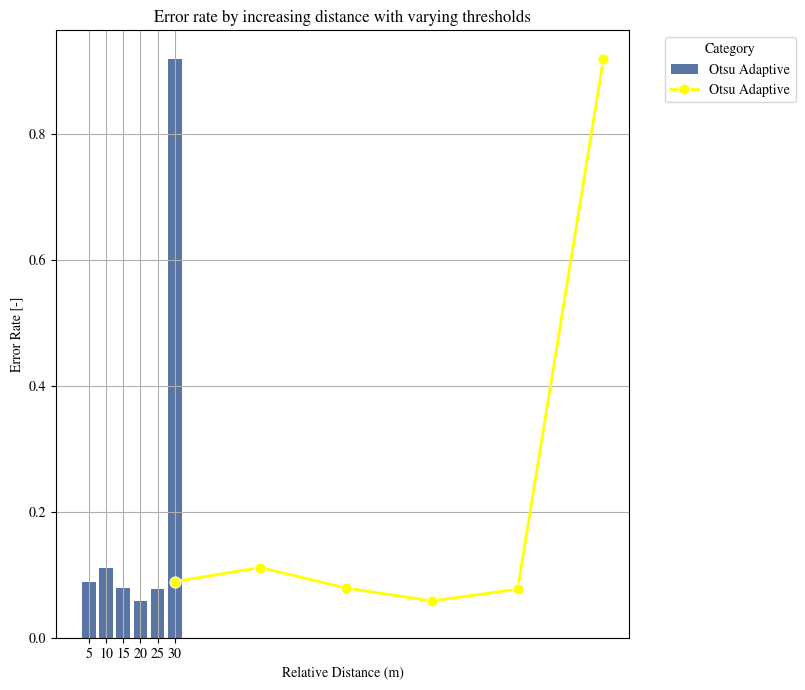

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Set the font to a serif font, like Times New Roman
#mpl.rcParams['font.family'] = 'cmu_serif'
#mpl.rcParams['mathtext.fontset'] = 'cm'
# Alternatively, for LaTeX typesetting (for truly academic appearance)
#mpl.rcParams['text.usetex'] = True
#mpl.rcdefaults()
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'



# Add a new column to each DataFrame to label the category before combining
""" th_200_summary_dynamic['category'] = 'Dynamic (Threshold = 200)'
th_100_v2_summary_dynamic['category'] = 'Dynamic (Threshold = 100)'
th_150_summary_dynamic['category'] = 'Dynamic (Threshold = 150)'
th_50_summary_dynamic['category'] = 'Dynamic (Threshold = 50)'
th_200_summary_static['category'] = 'Static (Threshold = 200)'
th_100_v2_summary_static['category'] = 'Static (Threshold = 100)'
th_150_summary_static['category'] = 'Static (Threshold = 150)'
th_50_summary_static['category'] = 'Static (Threshold = 50)'
adaptive_summary['category'] = 'KL-Adaptive' """
otsu_adaptive_summary_static['category'] = 'Otsu Adaptive'
""" kl_adaptive_summary['category'] = 'Dynamic KL-Adaptive'
otsu_adaptive_summary_dynamic['category'] = 'Dynamic Otsu Adaptive' """


#Just otsu adaptive
combined_data = otsu_adaptive_summary_static

""" 
# Combine all the DataFrames into one
combined_data = pd.concat([
    th_200_summary_dynamic,
    th_100_v2_summary_dynamic,
    th_150_summary_dynamic,
    th_50_summary_dynamic,
    th_200_summary_static,
    th_100_v2_summary_static,
    th_150_summary_static,
    th_50_summary_static,
    adaptive_summary,
    otsu_adaptive_summary,
    kl_adaptive_summary,
    otsu_adaptive_summary_dynamic

]) """


plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)

# Adjusted barplot with hue
sns.barplot(data=combined_data, x='nearest_distance', y='error_rate', hue='category', palette='deep')

plt.title('Error rate by increasing distance with varying thresholds')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')


""" # Bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=th_200_summary_dynamic, x='nearest_distance', y='error_rate', color='royalblue', label='Dynamic (Threshold = 200)')

#Include the threshold 100 data
sns.barplot(data=th_100_summary_dynamic, x='nearest_distance', y='error_rate', color='green', label='Dynamic (Threshold = 100)')

#Include the threshold 150 data
sns.barplot(data=th_150_summary_dynamic, x='nearest_distance', y='error_rate', color='pink', label='Dynamic (Threshold = 150)')

#Include the threshold 50 data
sns.barplot(data=th_50_summary_dynamic, x='nearest_distance', y='error_rate', color='gray', label='Dynamic (Threshold = 50)')

#Add the static data
sns.barplot(data=th_200_summary_static, x='nearest_distance', y='error_rate', color='red', label='Static (Threshold = 200)')

#Include the threshold 100 data
sns.barplot(data=th_100_summary_static, x='nearest_distance', y='error_rate', color='orange', label='Static (Threshold = 100)')

#Include the threshold 150 data
sns.barplot(data=th_150_summary_static, x='nearest_distance', y='error_rate', color='purple', label='Static (Threshold = 150)')

#Include the threshold 50 data
sns.barplot(data=th_50_summary_static, x='nearest_distance', y='error_rate', color='black', label='Static (Threshold = 50)')


plt.title('Error rate by increasing distance (Threshold = 200)')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]') """

""" # Line plot
plt.subplot(1, 2, 2)
sns.lineplot(data=th_200_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='royalblue', linewidth=2, markersize=8, label='Dynamic (Threshold = 200)')

#Include the threshold 100 data
sns.lineplot(data=th_100_v2_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='green', linewidth=2, markersize=8, label='Dynamic (Threshold = 100)')

#Include the threshold 150 data
sns.lineplot(data=th_150_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='pink', linewidth=2, markersize=8, label='Dynamic (Threshold = 150)')

#Include the threshold 50 data
sns.lineplot(data=th_50_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='gray', linewidth=2, markersize=8, label='Dynamic (Threshold = 50)')

#Add the static data
sns.lineplot(data=th_200_summary_static, x='nearest_distance', y='error_rate', marker='o', color='red', linewidth=2, markersize=8, label='Static (Threshold = 200)')

#Include the threshold 100 data
sns.lineplot(data=th_100_v2_summary_static, x='nearest_distance', y='error_rate', marker='o', color='orange', linewidth=2, markersize=8, label='Static (Threshold = 100)')

#Include the threshold 150 data
sns.lineplot(data=th_150_summary_static, x='nearest_distance', y='error_rate', marker='o', color='purple', linewidth=2, markersize=8, label='Static (Threshold = 150)')

#Include the threshold 50 data
sns.lineplot(data=th_50_summary_static, x='nearest_distance', y='error_rate', marker='o', color='black', linewidth=2, markersize=8, label='Static (Threshold = 50)')

#Add the adaptive data
sns.lineplot(data=adaptive_summary, x='nearest_distance', y='error_rate', marker='o', color='brown', linewidth=2, markersize=8, label='Adaptive')

#Add the kl adaptive data
sns.lineplot(data=kl_adaptive_summary, x='nearest_distance', y='error_rate', marker='o', color='green', linewidth=2, markersize=8, label='KL Adaptive') """

#Add the otsu adaptive data

sns.lineplot(data=otsu_adaptive_summary_static, x='nearest_distance', y='error_rate', marker='o', color='yellow', linewidth=2, markersize=8, label='Otsu Adaptive')

""" #Add the otsu adaptive data

sns.lineplot(data=otsu_adaptive_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='blue', linewidth=2, markersize=8, label='Dynamic Otsu Adaptive') """



#Move label to the top left
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Error rate by increasing distance with varying thresholds')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')
plt.grid(True)

plt.tight_layout()
plt.show()

In [58]:
import numpy as np


# Specified relative distances
#specified_distances = np.array([5, 8, 11, 14, 17, 20])

# Assigning each data point to the nearest specified distance
#data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['distance_x'].values).argmin(axis=0)]

# Summarizing the frequency of errors for these specified distances
specified_distance_summary = data.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})

specified_distance_summary

# Summarizing the frequency of errors for these specified distances
specified_distance_summary_static = data_static.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})

specified_distance_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,6150,3016,0.490407
1,8,6141,3036,0.494382
2,11,6163,2829,0.459030
3,14,6151,4916,0.799220
4,17,6142,5955,0.969554
5,20,6120,5997,0.979902


## Signal presence through trajectory

In [47]:
## Real world

# Calculating the overall presence of each signal in both datasets
overall_presence_adaptive = data_otsu_adaptive[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_standard = data_standard[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_adaptive_kl = data_kl_adaptive[['signal_0','signal_1', 'signal_3']].mean()

# Comparing the average distance for which each signal is detected
average_distance_adaptive = data_otsu_adaptive.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_standard = data_standard.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_adaptive_kl = data_kl_adaptive.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()

#Print as a table the overall presence of each signal in the three datasets
print(overall_presence_adaptive)
print(overall_presence_standard)
print(overall_presence_adaptive_kl)

#Print as a table the average distance for which each signal is detected
print(average_distance_adaptive)





#overall_presence_adaptive, overall_presence_standard, average_distance_adaptive, average_distance_standard, overall_presence_adaptive_kl, average_distance_adaptive_kl

signal_0    0.583640
signal_1    0.349622
signal_3    0.346090
dtype: float64
signal_0    0.345191
signal_1    0.387539
signal_3    0.418324
dtype: float64
signal_0    0.494267
signal_1    0.309517
signal_3    0.389494
dtype: float64
   signal_0  signal_1  signal_3  relative_distance_y
0         0         0         0            25.909918
1         0         1         0            19.699417
2         0         1         1            10.188406
3         1         0         0            17.798402
4         1         0         1            14.992198
5         1         1         0            10.939843
6         1         1         1             7.881407


In [77]:
## Real world

import pandas as pd

adaptive_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/otsu_exp3_processed.csv')

kl_adaptive_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/kl_exp3_processed.csv')

standard_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/standard_exp3_processed.csv')

# Drop rows with NaN distances if any
adaptive_df_clean = adaptive_df.dropna(subset=['uav38_distance_x'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav38_distance_y'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav38_distance_z'])

adaptive_df_clean = adaptive_df.dropna(subset=['uav39_distance_x'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav39_distance_y'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav39_distance_z'])


standard_df_clean = standard_df.dropna(subset=['uav38_distance_x'])
standard_df_clean = standard_df.dropna(subset=['uav38_distance_y'])
standard_df_clean = standard_df.dropna(subset=['uav38_distance_z'])

standard_df_clean = standard_df.dropna(subset=['uav39_distance_x'])
standard_df_clean = standard_df.dropna(subset=['uav39_distance_y'])
standard_df_clean = standard_df.dropna(subset=['uav39_distance_z'])

kl_adaptive_df_clean = kl_adaptive_df.dropna(subset=['uav38_distance_x'])
kl_adaptive_df_clean = kl_adaptive_df.dropna(subset=['uav38_distance_y'])
kl_adaptive_df_clean = kl_adaptive_df.dropna(subset=['uav38_distance_z'])

kl_adaptive_df_clean = kl_adaptive_df.dropna(subset=['uav39_distance_x'])
kl_adaptive_df_clean = kl_adaptive_df.dropna(subset=['uav39_distance_y'])
kl_adaptive_df_clean = kl_adaptive_df.dropna(subset=['uav39_distance_z'])




# Calculating the overall presence of each signal in both datasets
overall_presence_adaptive = adaptive_df[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_standard = standard_df[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_adaptive_kl = kl_adaptive_df[['signal_0','signal_1', 'signal_3']].mean()

# Comparing the average distance for which each signal is detected
average_distance_adaptive = adaptive_df.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_standard = standard_df.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_adaptive_kl = kl_adaptive_df.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()

overall_presence_adaptive, overall_presence_standard, average_distance_adaptive, average_distance_standard, overall_presence_adaptive_kl, average_distance_adaptive_kl

(signal_0    0.567101
 signal_1    0.334379
 signal_3    0.349231
 dtype: float64,
 signal_0    0.354764
 signal_1    0.385127
 signal_3    0.414650
 dtype: float64,
    signal_0  signal_1  signal_3  relative_distance_y
 0         0         0         0            24.313126
 1         0         0         1             0.439850
 2         0         1         0            20.337818
 3         0         1         1             8.870278
 4         1         0         0            16.540979
 5         1         0         1             2.991894
 6         1         1         0             8.554462
 7         1         1         1             7.332727,
    signal_0  signal_1  signal_3  relative_distance_y
 0         0         0         0            23.816085
 1         0         0         1            19.672967
 2         0         1         0            16.757231
 3         0         1         1            14.895629
 4         1         0         0            11.903448
 5         1         0 

In [37]:
#grouping by distance and calculating the signal presence rate

data_otsu_adaptive['rounded_distance'] = data_otsu_adaptive['relative_distance_y'].round()

#Otsu number of points per distance
otsu_num_points = data_otsu_adaptive.groupby('rounded_distance')['num_points'].mean().reset_index()

#grouping by distance and calculating the signal presence rate

data_kl_adaptive['rounded_distance'] = data_kl_adaptive['relative_distance_y'].round()
#KL number of points per distance
kl_num_points = data_kl_adaptive.groupby('rounded_distance')['num_points'].mean().reset_index()

#standard

data_standard['rounded_distance'] = data_standard['relative_distance_y'].round()
#Standard number of points per distance
standard_num_points = data_standard.groupby('rounded_distance')['num_points'].mean().reset_index()



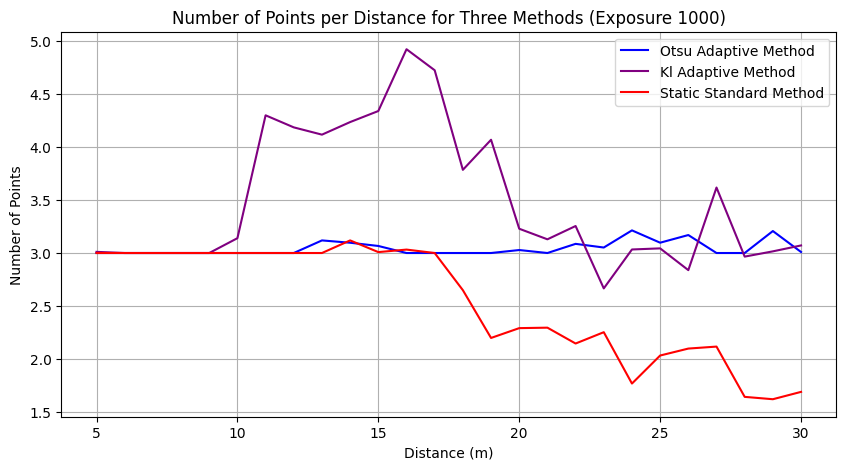

In [48]:
import matplotlib.pyplot as plt
import numpy as np

#Plot for the number of points per distance
plt.figure(figsize=(10, 5))
plt.plot(otsu_num_points['rounded_distance'], otsu_num_points['num_points'], label='Otsu Adaptive Method', color='blue')
plt.plot(kl_num_points['rounded_distance'], kl_num_points['num_points'], label='Kl Adaptive Method', color='purple')
plt.plot(standard_num_points['rounded_distance'], standard_num_points['num_points'], label='Static Standard Method', color='red')
plt.title('Number of Points per Distance for Three Methods (Exposure 1000)')
plt.xlabel('Distance (m)')
plt.ylabel('Number of Points')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [39]:
#grouping by distance and calculating the signal presence rate

data_otsu_adaptive['rounded_distance'] = data_otsu_adaptive['relative_distance_y'].round()

otsu_signal_presence_by_distance = data_otsu_adaptive.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

#grouping by distance and calculating the signal presence rate

data_kl_adaptive['rounded_distance'] = data_kl_adaptive['relative_distance_y'].round()

kl_signal_presence_by_distance = data_kl_adaptive.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

data_standard['rounded_distance'] = data_standard['relative_distance_y'].round()

standard_signal_presence_by_distance = data_standard.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()




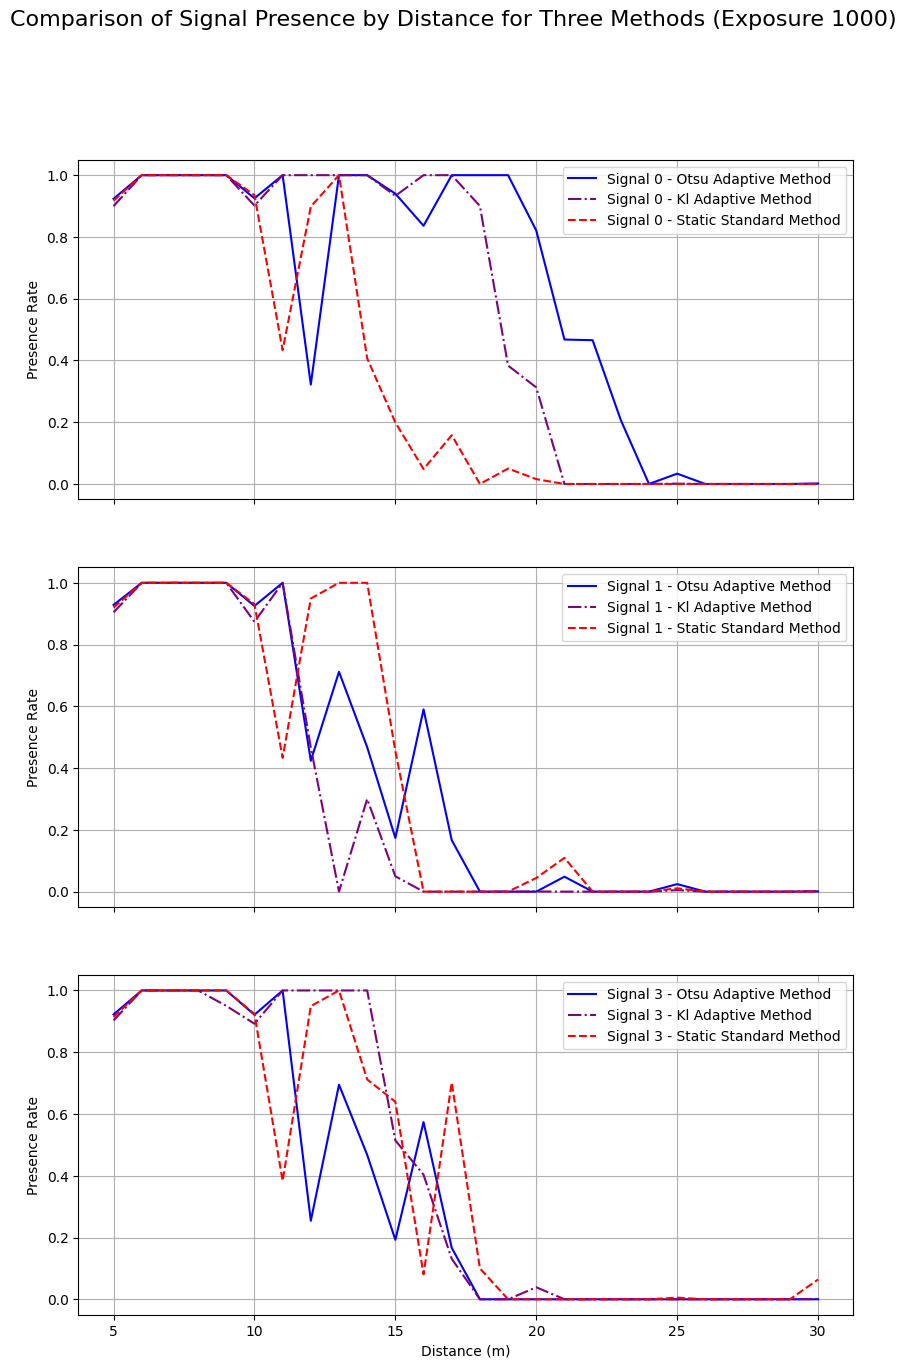

In [42]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Comparison of Signal Presence by Distance for Three Methods (Exposure 1000)', fontsize=16)

signals = ['signal_0','signal_1', 'signal_3']
colors = ['blue', 'green','purple']
labels = ['Signal 0','Signal 1', 'Signal 3']
method_names = ['Otsu Adaptive Method','Kl Adaptive Method', 'Static Standard Method']

# ignal presence for each signal
for i, signal in enumerate(signals):
    x_otsu = np.array(otsu_signal_presence_by_distance['rounded_distance'])
    y_otsu = np.array(otsu_signal_presence_by_distance[signal])
    x_kl = np.array(kl_signal_presence_by_distance['rounded_distance'])
    y_kl = np.array(kl_signal_presence_by_distance[signal])
    x_standard = np.array(standard_signal_presence_by_distance['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance[signal])
    
    axes[i].plot(x_otsu, y_otsu, color='blue', label=f'{labels[i]} - {method_names[0]}')
    axes[i].plot(x_kl, y_kl, '-.', color='purple', label=f'{labels[i]} - {method_names[1]}')
    axes[i].plot(x_standard, y_standard, '--', color='red', label=f'{labels[i]} - {method_names[2]}')
    axes[i].set_ylabel('Presence Rate')
    axes[i].legend(loc='best')
    axes[i].grid(True)

axes[-1].set_xlabel('Distance (m)')

plt.show()

# Heading 

In [7]:
## Real world

# Calculating the overall presence of each signal in both datasets
overall_presence_adaptive = data_adaptive_heading[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_standard = data_standard_heading[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_adaptive_kl = data_kl_adaptive_heading[['signal_0','signal_1', 'signal_3']].mean()

# Comparing the average distance for which each signal is detected
average_distance_adaptive = data_adaptive_heading.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_standard = data_standard_heading.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_adaptive_kl = data_kl_adaptive_heading.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()

overall_presence_adaptive, overall_presence_standard, average_distance_adaptive, average_distance_standard, overall_presence_adaptive_kl, average_distance_adaptive_kl

(signal_0    0.731768
 signal_1    0.010766
 signal_3    0.164528
 dtype: float64,
 signal_0    0.594329
 signal_1    0.125399
 signal_3    0.205831
 dtype: float64,
    signal_0  signal_1  signal_3  relative_distance_y
 0         0         0         0            16.396630
 1         0         0         1             5.730414
 2         0         1         0            10.609841
 3         0         1         1             5.088808
 4         1         0         0            15.901874
 5         1         0         1             8.968409
 6         1         1         1             4.986820,
    signal_0  signal_1  signal_3  relative_distance_y
 0         0         0         0            25.342967
 1         0         0         1            25.501587
 2         0         1         0            16.247306
 3         1         0         0            14.400171
 4         1         0         1            12.219741
 5         1         1         0             5.017637
 6         1         1 

In [8]:
#grouping by distance and calculating the signal presence rate

data_adaptive_heading['rounded_distance'] = data_adaptive_heading['relative_distance_y'].round()

#Otsu number of points per distance
otsu_num_points = data_adaptive_heading.groupby('rounded_distance')['num_points'].mean().reset_index()

#grouping by distance and calculating the signal presence rate

data_kl_adaptive_heading['rounded_distance'] = data_kl_adaptive_heading['relative_distance_y'].round()
#KL number of points per distance
kl_num_points = data_kl_adaptive_heading.groupby('rounded_distance')['num_points'].mean().reset_index()

#standard

data_standard_heading['rounded_distance'] = data_standard_heading['relative_distance_y'].round()
#Standard number of points per distance
standard_num_points = data_standard_heading.groupby('rounded_distance')['num_points'].mean().reset_index()

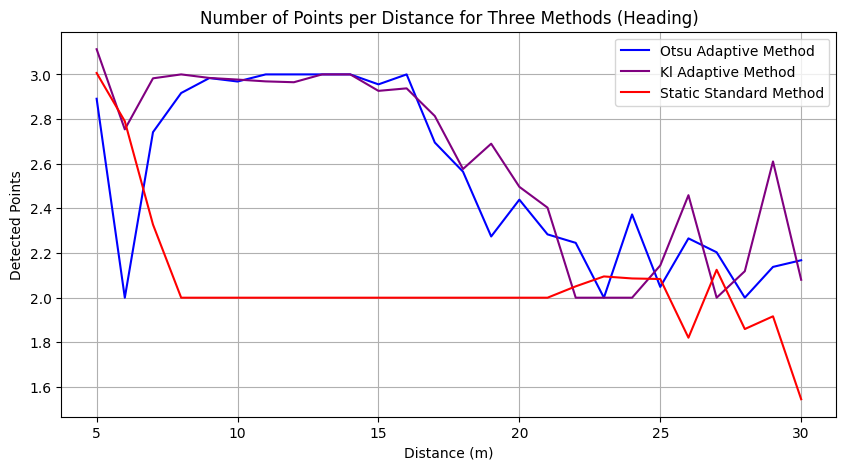

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#Plot for the number of points per distance
plt.figure(figsize=(10, 5))
plt.plot(otsu_num_points['rounded_distance'], otsu_num_points['num_points'], label='Otsu Adaptive Method', color='blue')
plt.plot(kl_num_points['rounded_distance'], kl_num_points['num_points'], label='Kl Adaptive Method', color='purple')
plt.plot(standard_num_points['rounded_distance'], standard_num_points['num_points'], label='Static Standard Method', color='red')
plt.title('Number of Points per Distance for Three Methods (Heading)')
plt.xlabel('Distance (m)')
plt.ylabel('Detected Points')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [10]:
#grouping by distance and calculating the signal presence rate

data_adaptive_heading['rounded_distance'] = data_adaptive_heading['relative_distance_y'].round()

otsu_signal_presence_by_distance = data_adaptive_heading.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

#grouping by distance and calculating the signal presence rate

data_kl_adaptive_heading['rounded_distance'] = data_kl_adaptive_heading['relative_distance_y'].round()

kl_signal_presence_by_distance = data_kl_adaptive_heading.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

data_standard_heading['rounded_distance'] = data_standard_heading['relative_distance_y'].round()

standard_signal_presence_by_distance = data_standard_heading.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

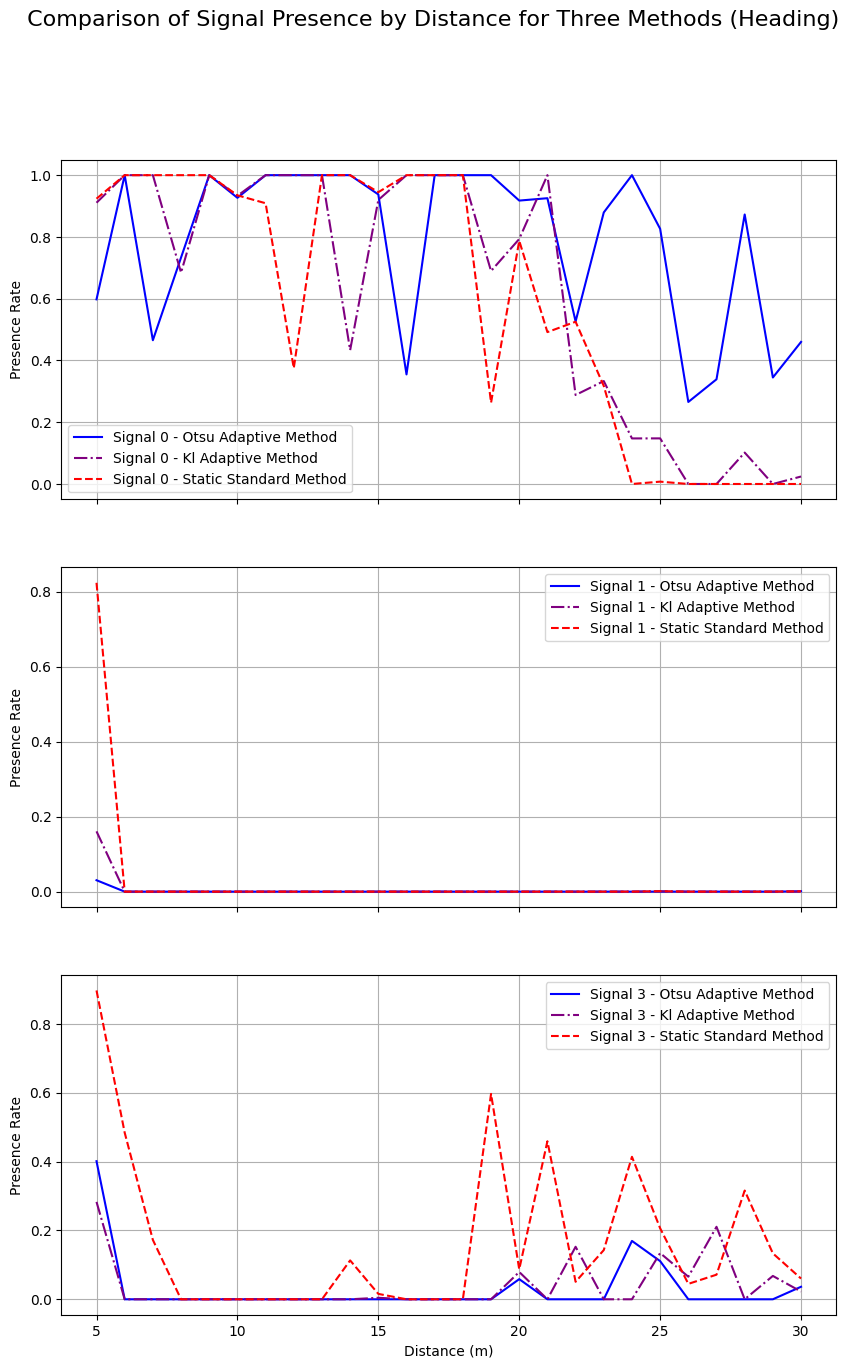

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle(' Comparison of Signal Presence by Distance for Three Methods (Heading)  ', fontsize=16)

signals = ['signal_0','signal_1', 'signal_3']
colors = ['blue', 'green','purple']
labels = ['Signal 0','Signal 1', 'Signal 3']
method_names = ['Otsu Adaptive Method','Kl Adaptive Method', 'Static Standard Method']

# ignal presence for each signal
for i, signal in enumerate(signals):
    x_otsu = np.array(otsu_signal_presence_by_distance['rounded_distance'])
    y_otsu = np.array(otsu_signal_presence_by_distance[signal])
    x_kl = np.array(kl_signal_presence_by_distance['rounded_distance'])
    y_kl = np.array(kl_signal_presence_by_distance[signal])
    x_standard = np.array(standard_signal_presence_by_distance['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance[signal])
    
    axes[i].plot(x_otsu, y_otsu, color='blue', label=f'{labels[i]} - {method_names[0]}')
    axes[i].plot(x_kl, y_kl, '-.', color='purple', label=f'{labels[i]} - {method_names[1]}')
    axes[i].plot(x_standard, y_standard, '--', color='red', label=f'{labels[i]} - {method_names[2]}')
    axes[i].set_ylabel('Presence Rate')
    axes[i].legend(loc='best')
    axes[i].grid(True)

axes[-1].set_xlabel('Distance (m)')

plt.show()

# Exposure 

In [50]:
## Real world

# Calculating the overall presence of each signal in both datasets
overall_presence_adaptive = data_adaptive_ex500[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_standard = data_standard_ex500[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_adaptive_kl = data_kl_adaptive_ex500[['signal_0','signal_1', 'signal_3']].mean()

# Comparing the average distance for which each signal is detected
average_distance_adaptive = data_adaptive_ex500.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_standard = data_standard_ex500.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_adaptive_kl = data_kl_adaptive_ex500.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()

#Print as a table the overall presence of each signal in the three datasets
print(overall_presence_adaptive)
print(overall_presence_standard)
print(overall_presence_adaptive_kl)


#overall_presence_adaptive, overall_presence_standard, average_distance_adaptive, average_distance_standard, overall_presence_adaptive_kl, average_distance_adaptive_kl

signal_0    0.480427
signal_1    0.428155
signal_3    0.501919
dtype: float64
signal_0    0.414743
signal_1    0.380285
signal_3    0.555994
dtype: float64
signal_0    0.415961
signal_1    0.351910
signal_3    0.489435
dtype: float64


In [180]:
#grouping by distance and calculating the signal presence rate

data_adaptive_ex500['rounded_distance'] = data_adaptive_ex500['relative_distance_y'].round()

#Otsu number of points per distance
otsu_num_points = data_adaptive_ex500.groupby('rounded_distance')['num_points'].mean().reset_index()

#grouping by distance and calculating the signal presence rate

data_kl_adaptive_ex500['rounded_distance'] = data_kl_adaptive_ex500['relative_distance_y'].round()
#KL number of points per distance
kl_num_points = data_kl_adaptive_ex500.groupby('rounded_distance')['num_points'].mean().reset_index()

#standard

data_standard_ex500['rounded_distance'] = data_standard_ex500['relative_distance_y'].round()
#Standard number of points per distance
standard_num_points = data_standard_ex500.groupby('rounded_distance')['num_points'].mean().reset_index()


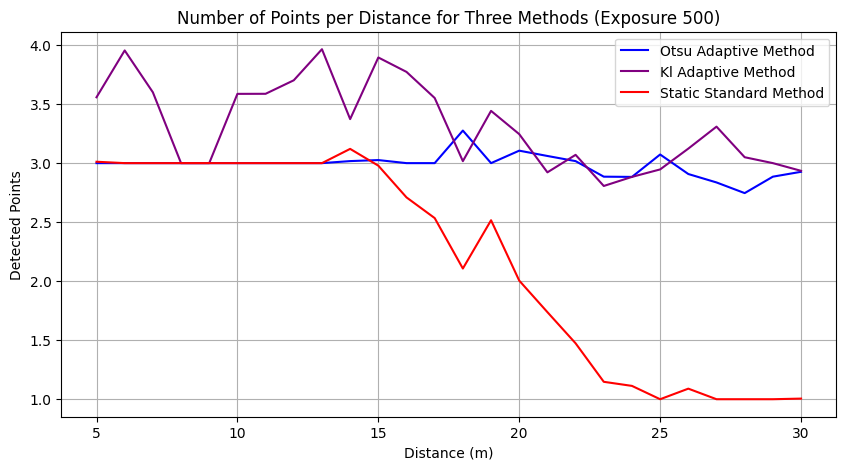

In [181]:
import matplotlib.pyplot as plt
import numpy as np

#Plot for the number of points per distance
plt.figure(figsize=(10, 5))
plt.plot(otsu_num_points['rounded_distance'], otsu_num_points['num_points'], label='Otsu Adaptive Method', color='blue')
plt.plot(kl_num_points['rounded_distance'], kl_num_points['num_points'], label='Kl Adaptive Method', color='purple')
plt.plot(standard_num_points['rounded_distance'], standard_num_points['num_points'], label='Static Standard Method', color='red')
plt.title('Number of Points per Distance for Three Methods (Exposure 500)')
plt.xlabel('Distance (m)')
plt.ylabel('Detected Points')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [182]:
#grouping by distance and calculating the signal presence rate

data_adaptive_ex500['rounded_distance'] = data_adaptive_ex500['relative_distance_y'].round()

otsu_signal_presence_by_distance = data_adaptive_ex500.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

#grouping by distance and calculating the signal presence rate

data_kl_adaptive_ex500['rounded_distance'] = data_kl_adaptive_ex500['relative_distance_y'].round()

kl_signal_presence_by_distance = data_kl_adaptive_ex500.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

data_standard_ex500['rounded_distance'] = data_standard_ex500['relative_distance_y'].round()

standard_signal_presence_by_distance = data_standard_ex500.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

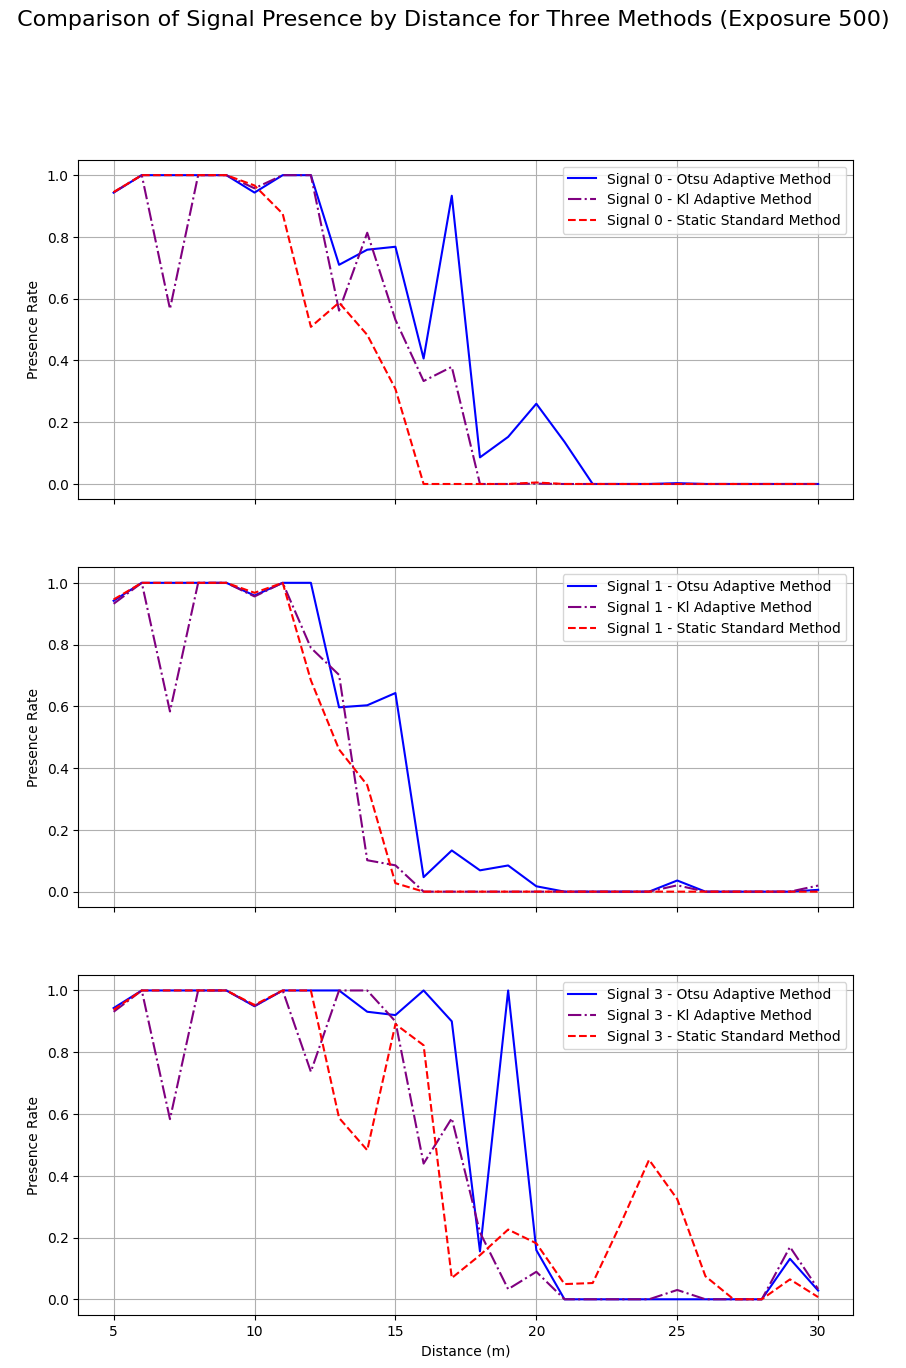

In [183]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle(' Comparison of Signal Presence by Distance for Three Methods (Exposure 500) ', fontsize=16)

signals = ['signal_0','signal_1', 'signal_3']
colors = ['blue', 'green','purple']
labels = ['Signal 0','Signal 1', 'Signal 3']
method_names = ['Otsu Adaptive Method','Kl Adaptive Method', 'Static Standard Method']

# ignal presence for each signal
for i, signal in enumerate(signals):
    x_otsu = np.array(otsu_signal_presence_by_distance['rounded_distance'])
    y_otsu = np.array(otsu_signal_presence_by_distance[signal])
    x_kl = np.array(kl_signal_presence_by_distance['rounded_distance'])
    y_kl = np.array(kl_signal_presence_by_distance[signal])
    x_standard = np.array(standard_signal_presence_by_distance['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance[signal])
    
    axes[i].plot(x_otsu, y_otsu, color='blue', label=f'{labels[i]} - {method_names[0]}')
    axes[i].plot(x_kl, y_kl, '-.', color='purple', label=f'{labels[i]} - {method_names[1]}')
    axes[i].plot(x_standard, y_standard, '--', color='red', label=f'{labels[i]} - {method_names[2]}')
    axes[i].set_ylabel('Presence Rate')
    axes[i].legend(loc='best')
    axes[i].grid(True)

axes[-1].set_xlabel('Distance (m)')

plt.show()

## Signal Presence heading experiment

In [111]:
## Real world

import pandas as pd

adaptive_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/otsu_exp3_heading_processed.csv')

standard_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/standard_exp3_heading_processed.csv')

# Drop rows with NaN distances if any
adaptive_df_clean = adaptive_df.dropna(subset=['uav38_distance_x'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav38_distance_y'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav38_distance_z'])

adaptive_df_clean = adaptive_df.dropna(subset=['uav39_distance_x'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav39_distance_y'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav39_distance_z'])


standard_df_clean = standard_df.dropna(subset=['uav38_distance_x'])
standard_df_clean = standard_df.dropna(subset=['uav38_distance_y'])
standard_df_clean = standard_df.dropna(subset=['uav38_distance_z'])

standard_df_clean = standard_df.dropna(subset=['uav39_distance_x'])
standard_df_clean = standard_df.dropna(subset=['uav39_distance_y'])
standard_df_clean = standard_df.dropna(subset=['uav39_distance_z'])


# Calculating the overall presence of each signal in both datasets
overall_presence_adaptive = adaptive_df[['signal_0','signal_1', 'signal_2', 'signal_3']].mean()
overall_presence_standard = standard_df[['signal_0','signal_1', 'signal_2', 'signal_3']].mean()

# Comparing the average distance for which each signal is detected
average_distance_adaptive = adaptive_df.groupby(['signal_0','signal_1', 'signal_2', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_standard = standard_df.groupby(['signal_0','signal_1', 'signal_2', 'signal_3'])['relative_distance_y'].mean().reset_index()

overall_presence_adaptive, overall_presence_standard, average_distance_adaptive, average_distance_standard

(signal_0    0.683901
 signal_1    0.022145
 signal_2    0.040535
 signal_3    0.206817
 dtype: float64,
 signal_0    0.548670
 signal_1    0.151744
 signal_2    0.032006
 signal_3    0.260794
 dtype: float64,
     signal_0  signal_1  signal_2  signal_3  relative_distance_y
 0          0         0         0         0            14.731773
 1          0         0         0         1             6.360984
 2          0         0         1         0             8.956449
 3          0         0         1         1             7.567072
 4          0         1         0         0            18.143488
 5          0         1         0         1             4.999998
 6          1         0         0         0            15.394262
 7          1         0         0         1             8.555667
 8          1         0         1         0             8.634072
 9          1         0         1         1             4.815958
 10         1         1         0         0             5.000163
 11       

In [112]:
#grouping by distance and calculating the signal presence rate

adaptive_df['rounded_distance'] = adaptive_df['relative_distance_y'].round()

otsu_signal_presence_by_distance = adaptive_df.groupby('rounded_distance')[['signal_0','signal_1', 'signal_2', 'signal_3']].mean().reset_index()

otsu_signal_presence_by_distance.head()

,rounded_distance,signal_0,signal_1,signal_2,signal_3
0,3.0,0.532609,0.000000,0.527174,0.527174
1,4.0,0.742152,0.000000,0.742152,0.742152
2,5.0,0.628881,0.055541,0.023555,0.395476
3,6.0,0.733645,0.000000,0.453271,0.453271
4,7.0,0.714286,0.000000,0.461538,0.593407


In [113]:
standard_df['rounded_distance'] = standard_df['relative_distance_y'].round()

standard_signal_presence_by_distance = standard_df.groupby('rounded_distance')[['signal_0','signal_1', 'signal_2', 'signal_3']].mean().reset_index()

standard_signal_presence_by_distance.head()

,rounded_distance,signal_0,signal_1,signal_2,signal_3
0,2.0,0.000000,0.000000,0.000000,0.000000
1,3.0,0.000000,0.000000,0.031496,0.039370
2,4.0,0.622030,0.000000,0.533477,0.656587
3,5.0,0.891698,0.787453,0.027154,0.863920
4,6.0,0.614035,0.000000,0.355263,0.491228


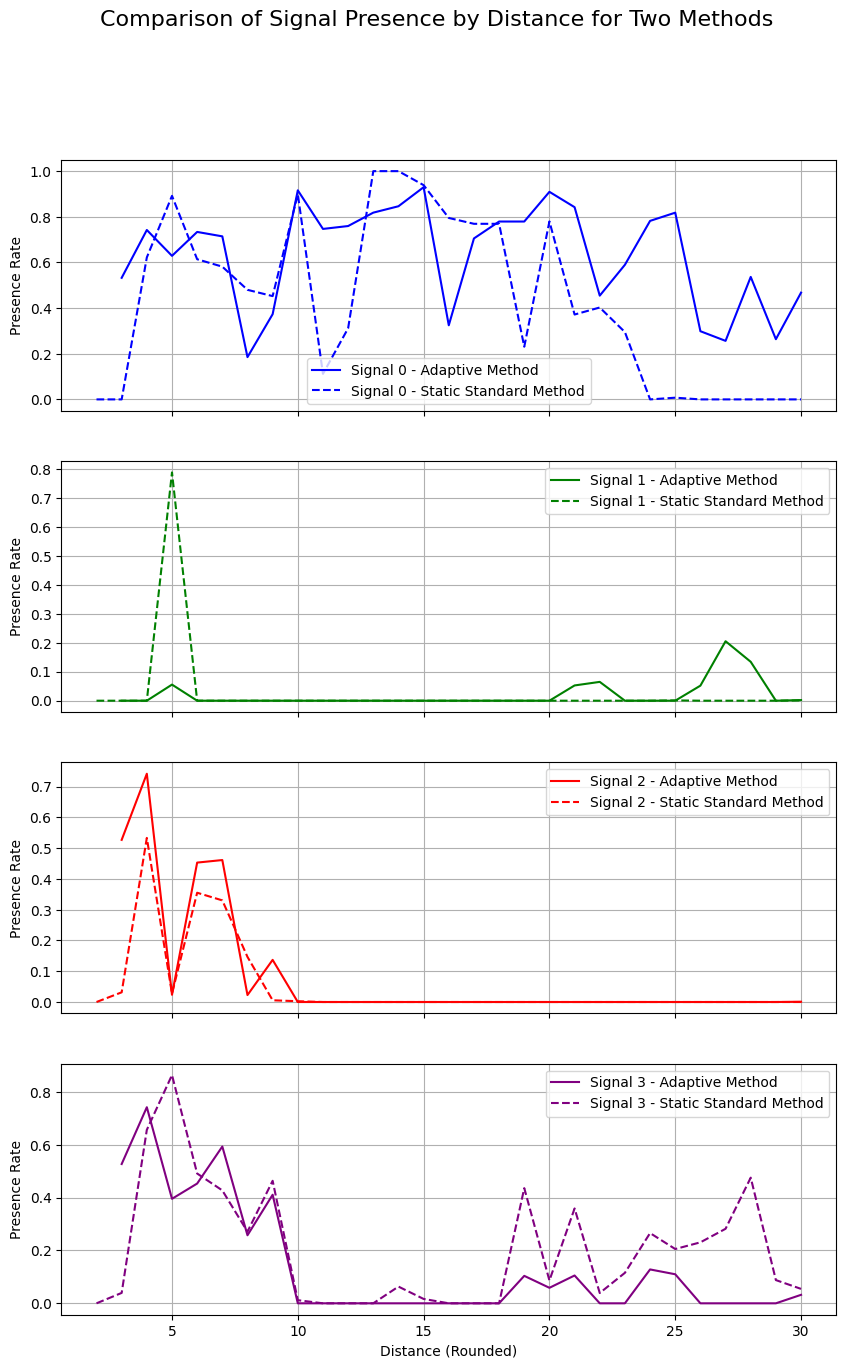

In [114]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Comparison of Signal Presence by Distance for Two Methods', fontsize=16)

signals = ['signal_0','signal_1', 'signal_2', 'signal_3']
colors = ['blue', 'green', 'red','purple']
labels = ['Signal 0','Signal 1', 'Signal 2', 'Signal 3']
method_names = ['Adaptive Method', 'Static Standard Method']

# ignal presence for each signal
for i, signal in enumerate(signals):
    x_kl = np.array(otsu_signal_presence_by_distance['rounded_distance'])
    y_kl = np.array(otsu_signal_presence_by_distance[signal])
    x_standard = np.array(standard_signal_presence_by_distance['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance[signal])
    
    axes[i].plot(x_kl, y_kl, color=colors[i], label=f'{labels[i]} - {method_names[0]}')
    axes[i].plot(x_standard, y_standard, '--', color=colors[i], label=f'{labels[i]} - {method_names[1]}')
    axes[i].set_ylabel('Presence Rate')
    axes[i].legend(loc='best')
    axes[i].grid(True)

axes[-1].set_xlabel('Distance (Rounded)')

plt.show()

# Simulation 

In [166]:
import pandas as pd

# Load the datasets
adaptive_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/simulation/processed_csv/static_otsu_adaptive_heading_exp_v3_processed.csv')

standard_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/simulation/processed_csv/static_static_heading_exp_v3_processed.csv')

# Drop rows with NaN distances if any
adaptive_df_clean = adaptive_df.dropna(subset=['distance_x'])
standard_df_clean = standard_df.dropna(subset=['distance_x'])

# Calculating the overall presence of each signal in both datasets
overall_presence_adaptive = adaptive_df[['signal_1', 'signal_2', 'signal_3']].mean()
overall_presence_standard = standard_df[['signal_1', 'signal_2', 'signal_3']].mean()

# Comparing the average distance for which each signal is detected
average_distance_adaptive = adaptive_df.groupby(['signal_1', 'signal_2', 'signal_3'])['distance_x'].mean().reset_index()
average_distance_standard = standard_df.groupby(['signal_1', 'signal_2', 'signal_3'])['distance_x'].mean().reset_index()

overall_presence_adaptive, overall_presence_standard, average_distance_adaptive, average_distance_standard

(signal_1    0.592739
 signal_2    0.592739
 signal_3    1.000000
 dtype: float64,
 signal_1    0.384183
 signal_2    0.392098
 signal_3    1.000000
 dtype: float64,
    signal_1  signal_2  signal_3  distance_x
 0         0         0         1   12.836584
 1         1         1         1    7.199130,
    signal_1  signal_2  signal_3  distance_x
 0         0         0         1   11.701038
 1         0         1         1    7.995741
 2         1         0         1    7.995741
 3         1         1         1    6.037778)

In [167]:
#grouping by distance and calculating the signal presence rate

# Round the distances to the nearest integer for easier comparison
adaptive_df['rounded_distance'] = adaptive_df['distance_x'].round()

# Group by the rounded distance and calculate the mean for signal presence columns
kl_signal_presence_by_distance = adaptive_df.groupby('rounded_distance')[['signal_1', 'signal_2', 'signal_3']].mean().reset_index()

kl_signal_presence_by_distance.head()

,rounded_distance,signal_1,signal_2,signal_3
0,5.0,1.000000,1.000000,1.0
1,8.0,1.000000,1.000000,1.0
2,11.0,0.370627,0.370627,1.0
3,14.0,0.000000,0.000000,1.0


In [168]:
standard_df['rounded_distance'] = standard_df['distance_x'].round()

standard_signal_presence_by_distance = standard_df.groupby('rounded_distance')[['signal_1', 'signal_2', 'signal_3']].mean().reset_index()

standard_signal_presence_by_distance.head()

,rounded_distance,signal_1,signal_2,signal_3
0,5.0,1.000000,1.00000,1.0
1,8.0,0.536091,0.56774,1.0
2,11.0,0.000000,0.00000,1.0
3,14.0,0.000000,0.00000,1.0


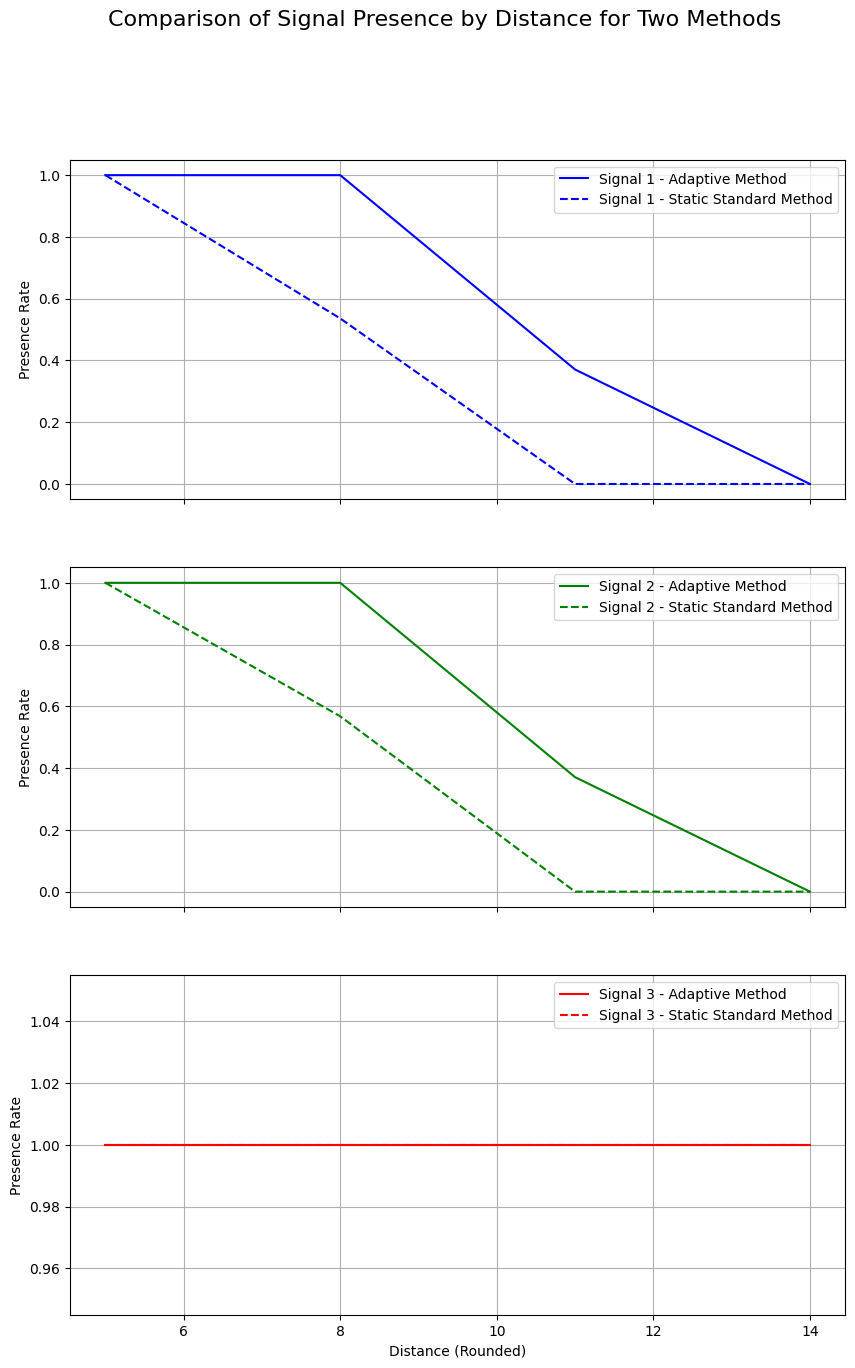

In [169]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plotting area
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Comparison of Signal Presence by Distance for Two Methods', fontsize=16)

# Plot settings
signals = ['signal_1', 'signal_2', 'signal_3']
colors = ['blue', 'green', 'red']
labels = ['Signal 1', 'Signal 2', 'Signal 3']
method_names = ['Adaptive Method', 'Static Standard Method']

# Plotting the signal presence for each signal
for i, signal in enumerate(signals):
    # Convert data to numpy arrays
    x_kl = np.array(kl_signal_presence_by_distance['rounded_distance'])
    y_kl = np.array(kl_signal_presence_by_distance[signal])
    x_standard = np.array(standard_signal_presence_by_distance['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance[signal])
    
    # Plot data
    axes[i].plot(x_kl, y_kl, color=colors[i], label=f'{labels[i]} - {method_names[0]}')
    axes[i].plot(x_standard, y_standard, '--', color=colors[i], label=f'{labels[i]} - {method_names[1]}')
    axes[i].set_ylabel('Presence Rate')
    axes[i].legend(loc='best')
    axes[i].grid(True)

axes[-1].set_xlabel('Distance (Rounded)')

plt.show()

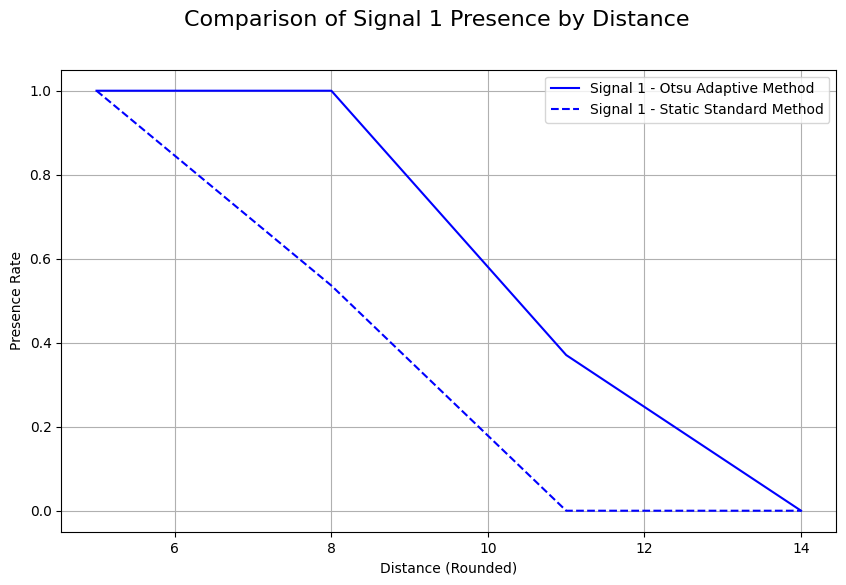

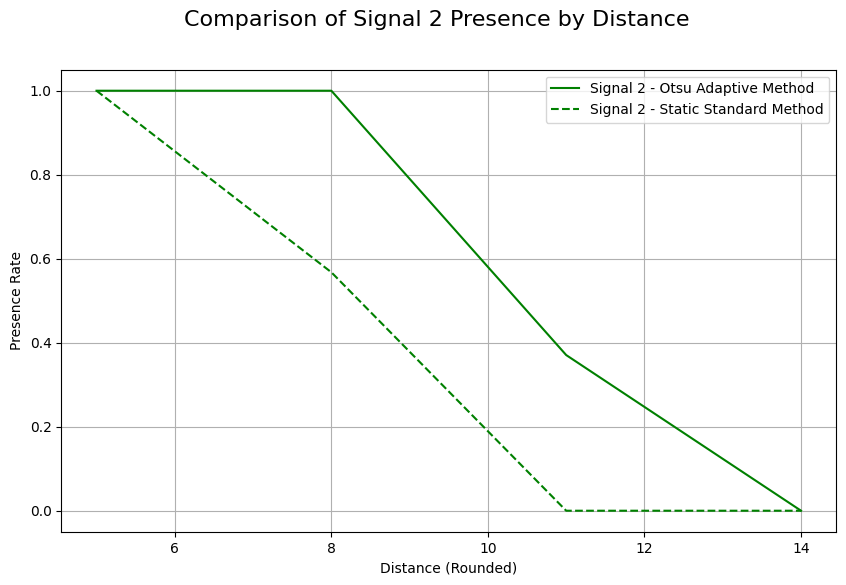

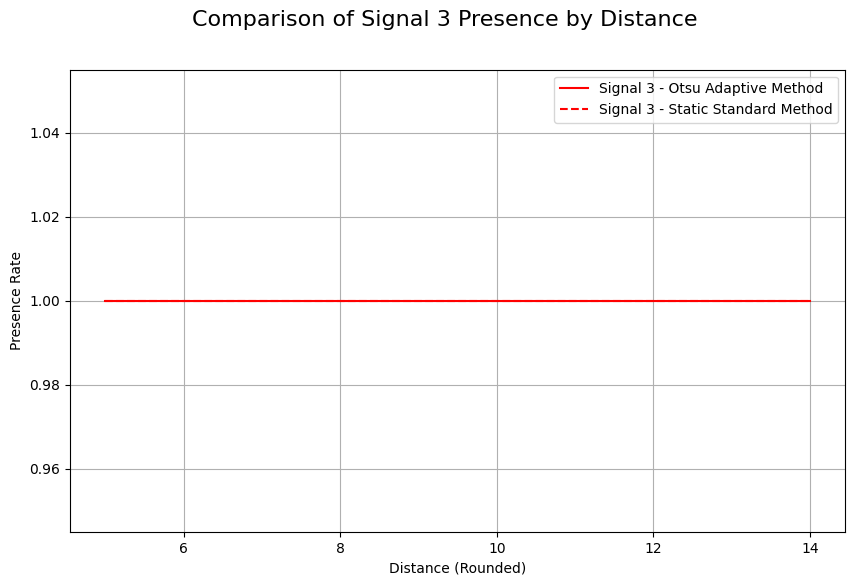

In [170]:
import matplotlib.pyplot as plt
import numpy as np

# Signals, colors, labels, and methods names setup
signals = ['signal_1', 'signal_2', 'signal_3']
colors = ['blue', 'green', 'red']
labels = ['Signal 1', 'Signal 2', 'Signal 3']
method_names = ['Otsu Adaptive Method', 'Static Standard Method']

# Iterate through each signal to create individual plots
for index, signal in enumerate(signals):
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
    fig.suptitle(f'Comparison of {labels[index]} Presence by Distance', fontsize=16)
    
    # Convert data to numpy arrays
    x_kl = np.array(kl_signal_presence_by_distance['rounded_distance'])
    y_kl = np.array(kl_signal_presence_by_distance[signal])
    x_standard = np.array(standard_signal_presence_by_distance['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance[signal])
    
    # Plotting data for KL Adaptive Method and Static Standard Method
    ax.plot(x_kl, y_kl, color=colors[index], label=f'{labels[index]} - {method_names[0]}')
    ax.plot(x_standard, y_standard, '--', color=colors[index], label=f'{labels[index]} - {method_names[1]}')

    # Setting labels and title
    ax.set_xlabel('Distance (Rounded)')
    ax.set_ylabel('Presence Rate')
    ax.legend(loc='best')
    ax.grid(True)
    
    # Show the plot
    plt.show()

## Plotting overall signal presence


<Figure size 1200x600 with 0 Axes>

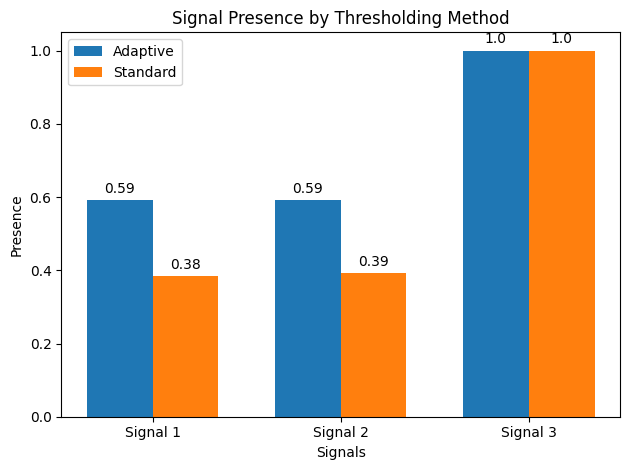

In [171]:
import matplotlib.pyplot as plt
import numpy as np

# Visualization 1: Overall Signal Presence Comparison
plt.figure(figsize=(12, 6))

# Data for plotting
labels = ['Signal 1', 'Signal 2', 'Signal 3']
adaptive_means = overall_presence_adaptive.values
standard_means = overall_presence_standard.values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, adaptive_means, width, label='Adaptive')
rects2 = ax.bar(x + width/2, standard_means, width, label='Standard')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Signals')
ax.set_ylabel('Presence')
ax.set_title('Signal Presence by Thresholding Method')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to autolabel the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

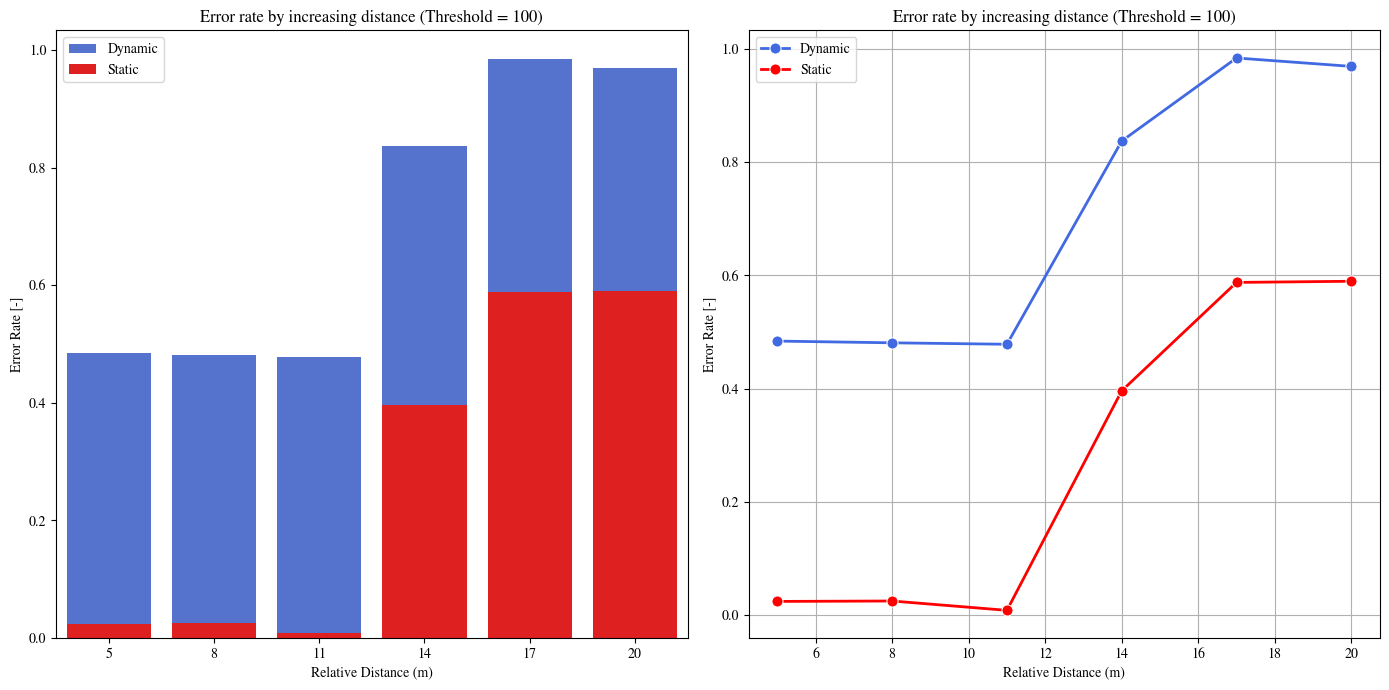

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Set the font to a serif font, like Times New Roman
#mpl.rcParams['font.family'] = 'cmu_serif'
#mpl.rcParams['mathtext.fontset'] = 'cm'
# Alternatively, for LaTeX typesetting (for truly academic appearance)
#mpl.rcParams['text.usetex'] = True
#mpl.rcdefaults()
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.figure(figsize=(14, 7))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=specified_distance_summary, x='nearest_distance', y='error_rate', color='royalblue', label='Dynamic')

#Add the static data
sns.barplot(data=specified_distance_summary_static, x='nearest_distance', y='error_rate', color='red', label='Static')
plt.title('Error rate by increasing distance (Threshold = 100)')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')

# Line plot
plt.subplot(1, 2, 2)
sns.lineplot(data=specified_distance_summary, x='nearest_distance', y='error_rate', marker='o', color='royalblue', linewidth=2, markersize=8, label='Dynamic')

#Add the static data
sns.lineplot(data=specified_distance_summary_static, x='nearest_distance', y='error_rate', marker='o', color='red', linewidth=2, markersize=8, label='Static')
plt.title('Error rate by increasing distance (Threshold = 100)')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')
plt.grid(True)

plt.tight_layout()
plt.show()

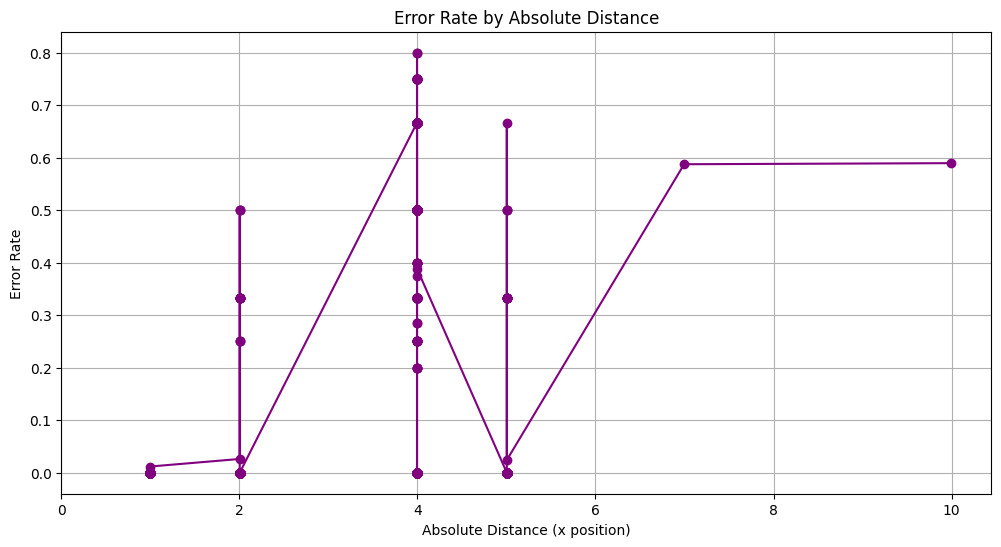

In [51]:
#Make all distances positive
import pandas as pd
import os

import matplotlib.pyplot as plt
data['distance_x'] = data['distance_x'].abs()

# Save the cleaned data to a new CSV file
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_standard_static_cleaned.csv')

data.to_csv(cleaned_file_path, index=False)

cleaned_file_path, data.head(50)  # Return the path to the new CSV and display the first few rows of the cleaned data.



error_rate_by_abs_distance = data.groupby('distance_x')['is_error'].mean().sort_index()
# Plot error rates with absolute distances
plt.figure(figsize=(12, 6))
plt.plot(error_rate_by_abs_distance.index, error_rate_by_abs_distance.values, marker='o', linestyle='-', color='purple')
plt.title('Error Rate by Absolute Distance')
plt.xlabel('Absolute Distance (x position)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.xlim(left=0)  # Ensure x-axis starts from 0
plt.show()

In [47]:
data.head(50)  # Display the first few rows of the cleaned data.

,timestamp,distance_x,value,is_error,adjusted_distance_x
0,54.148,5.004249,0.0,0,10.004249
1,54.148,5.004249,3.0,0,10.004249
2,54.152,5.004249,2.0,0,10.004249
3,54.164,5.004249,2.0,0,10.004249
4,54.168,5.004249,0.0,0,10.004249
5,54.168,5.004249,3.0,0,10.004249
6,54.180,5.004249,0.0,0,10.004249
7,54.180,5.004249,2.0,0,10.004249
8,54.184,5.004249,3.0,0,10.004249
9,54.196,5.004249,2.0,0,10.004249


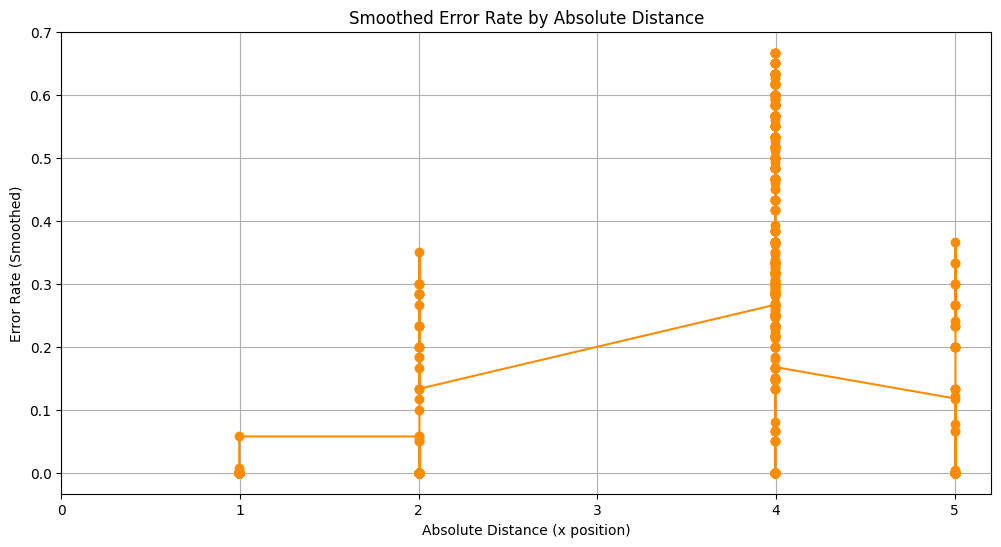

In [45]:
# Apply a moving average to smooth the data and reduce spikes
# Choosing a window size that balances smoothness with retaining the underlying trend
window_size = 5
smoothed_error_rate_abs = error_rate_by_abs_distance.rolling(window=window_size, center=True).mean()

# Plot the smoothed error rates against absolute distances
plt.figure(figsize=(12, 6))
plt.plot(smoothed_error_rate_abs.index, smoothed_error_rate_abs.values, marker='o', linestyle='-', color='darkorange')
plt.title('Smoothed Error Rate by Absolute Distance')
plt.xlabel('Absolute Distance (x position)')
plt.ylabel('Error Rate (Smoothed)')
plt.grid(True)
plt.xlim(left=0)  # Ensure x-axis starts from 0
plt.show()

0.9957509721555614


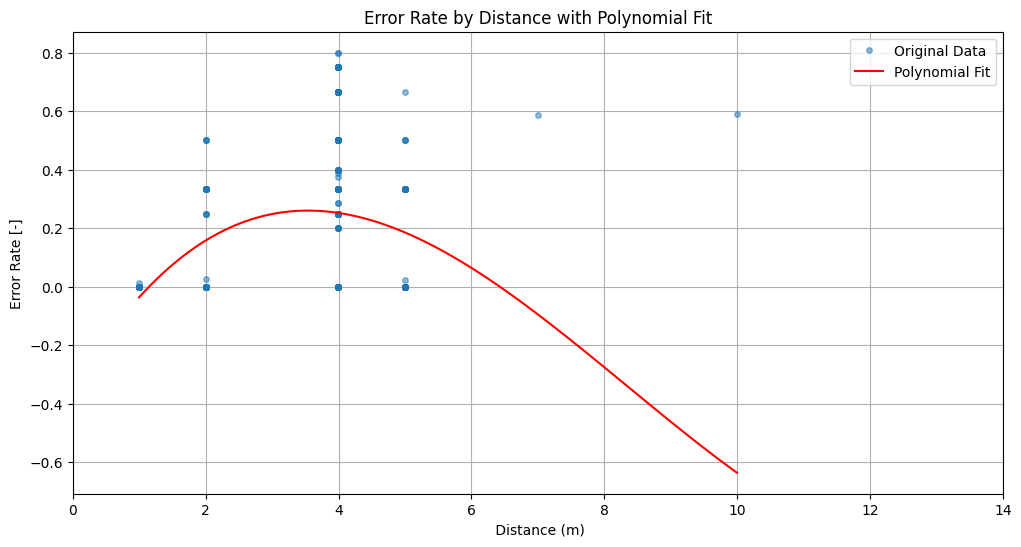

In [62]:
from numpy import polyfit, poly1d
import numpy as np


data['adjusted_distance_x'] = data['distance_x'] + 0
# Recalculate error rates with the adjusted distances
error_rate_by_adjusted_distance = data.groupby('adjusted_distance_x')['is_error'].mean().sort_index()

left_bound = error_rate_by_adjusted_distance.index.min()
print(left_bound)


# Fit a polynomial regression to the adjusted data
coef_adjusted = polyfit(error_rate_by_adjusted_distance.index, error_rate_by_adjusted_distance.values, 3)
poly_adjusted = poly1d(coef_adjusted)

# Generate x and y values for the polynomial fit over the adjusted distances
x_poly_adjusted = np.linspace(error_rate_by_adjusted_distance.index.min(), error_rate_by_adjusted_distance.index.max(), 100)
y_poly_adjusted = poly_adjusted(x_poly_adjusted)

# Plot the original data and the polynomial regression line with adjusted distances
plt.figure(figsize=(12, 6))
plt.plot(error_rate_by_adjusted_distance.index, error_rate_by_adjusted_distance.values, 'o', markersize=4, alpha=0.5, label='Original Data')
plt.plot(x_poly_adjusted, y_poly_adjusted, 'r-', label='Polynomial Fit')
plt.title('Error Rate by Distance with Polynomial Fit')
plt.xlabel(' Distance (m)')
plt.ylabel('Error Rate [-]')
plt.legend()
plt.grid(True)
plt.xlim(left_bound)  # Adjust the left bound to reflect the distance adjustment
#More descriptive x-limit
plt.xlim(left=0, right=14)
plt.show()

